Material bidimensional composto de uma grade de objetos, cada um tendo o que se resume a um mini-ímã que pode apontar para cima ou para baixo. Colocamos esses mini-ímãs de forma aleatória em uma rotação para cima ou para baixo no tempo zero e, em seguida, executamos  o registro do sistema (SOR) conforme ele evolui de um estado aleatório para um estado ordenado em baixa temperatura. 

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pdb
import numpy as np

In [22]:
## inspired by https://rajeshrinet.github.io/blog/2014/ising-model/


### CONFIGURATION
N           = 5 # width of lattice
M           = 5 # height of lattice
temperature = 0.5
BETA        = 1 / temperature

In [23]:
# initialize system
# Inicialização aleatória do bloco inicial. 
def initRandState(N, M):
    block = np.random.choice([-1, 1], size = (N, M))
    return block

energia para um determinado alinhamento de estado central em relaçãlo aos seus vizinhos

In [24]:
def costForCenterState(state, i, j, n, m):
    centerS = state[i, j]
    neighbors = [((i + 1) % n, j), ((i - 1) % n, j),
                 (i, (j + 1) % m), (i, (j - 1) % m)]
    ## notice the % n because we impose periodic boundary conditions
    ## ignore this if it doesn't make sense - it's merely a physical constraint on the system

    interactionE = [state[x, y] * centerS for (x, y) in neighbors]
    return np.sum(interactionE)


def magnetizationForState(state):
    return np.sum(state)

aplicamos o MCMC Monte Carlo e Cadeias de Markov

In [25]:
# mcmc steps
def mcmcAdjust(state):
    n = state.shape[0]
    m = state.shape[1]
    x, y = np.random.randint(0, n), np.random.randint(0, m)
    centerS = state[x, y]
    cost = costForCenterState(state, x, y, n, m)
    if cost < 0:
        centerS *= -1
    elif np.random.random() < np.exp(-cost * BETA):
        centerS *= -1
    state[x, y] = centerS
    return state

#ajuste MCMC
def runState(state, n_steps, snapsteps = None):
    if snapsteps is None:
        snapsteps = np.linspace(0, n_steps, num = round(n_steps / (M * N * 100)), dtype = np.int32)
    saved_states = []
    sp = 0
    magnet_hist = []
    for i in range(n_steps):
        state = mcmcAdjust(state)
        magnet_hist.append(magnetizationForState(state))
        if sp < len(snapsteps) and i == snapsteps[sp]:
            saved_states.append(np.copy(state))
            sp += 1
    return state, saved_states, magnet_hist



In [26]:
init_state = initRandState(N, M)
print(init_state)

final_state = runState(np.copy(init_state), 1000)



[[-1  1 -1 -1 -1]
 [-1 -1 -1  1 -1]
 [-1  1 -1 -1  1]
 [-1 -1  1 -1  1]
 [-1 -1  1 -1 -1]]


In [33]:
import numpy as np
import matplotlib.pyplot as plt

Estado inicial de um material ferromagnético simulado 5X5 , inicializado com cada estado selecionado aleatoriamente, rotacionado para cima ou para baixo com probabilidade igual.  

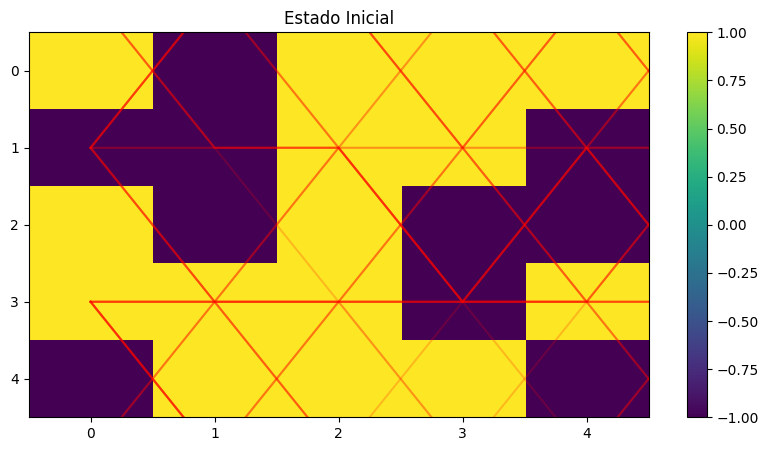

In [32]:
### RUN A SIMULATION
init_state = initRandState(N, M)
plt.imshow(init_state)
plt.imshow(init_state, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Estado Inicial')
plt.show()

In [34]:
final_state, states, magnet_hist = runState(init_state, 1000)

In [36]:
plt.imshow(final_state)


estado final de baixa temperatura em nossa simulação executada, conforme visto em 1000 intervalos de tempo. 

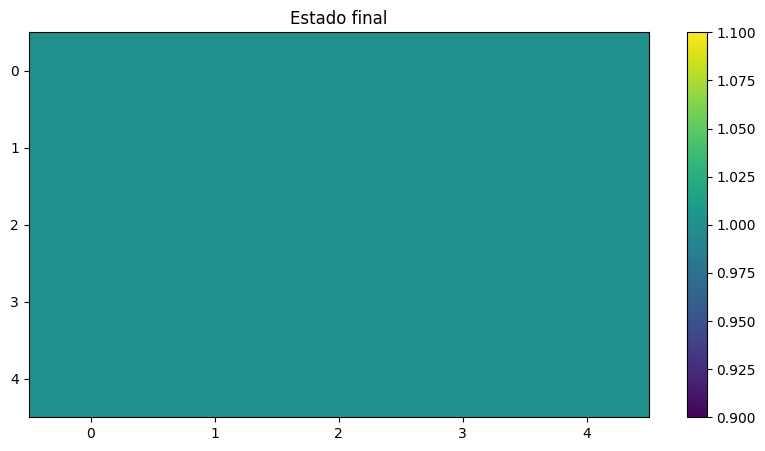

In [37]:
plt.imshow(final_state, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Estado final')
plt.show()

## Exercise: Modify the simulation code above to visualize magnetization over time for 100 test runs

coleta cada série temporal como um elemento separado na lista de resultados. 

In [38]:
results = []
for i in range(100):
    init_state = initRandState(N, M)
    final_state, states, magnet_hist = runState(init_state, 1000)
    results.append(magnet_hist)

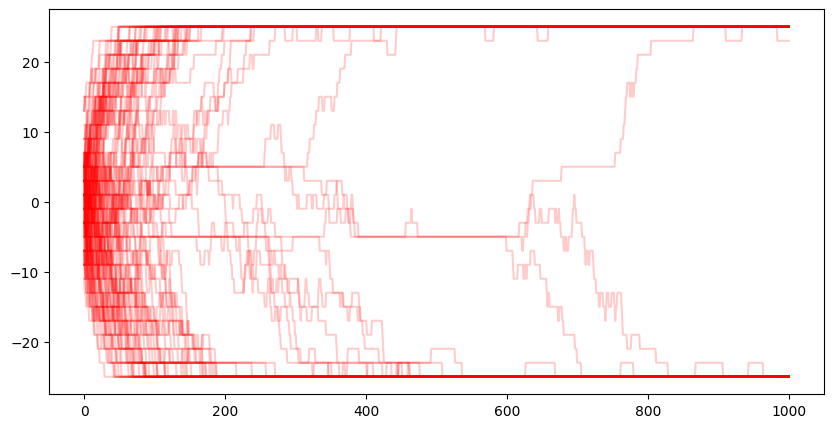

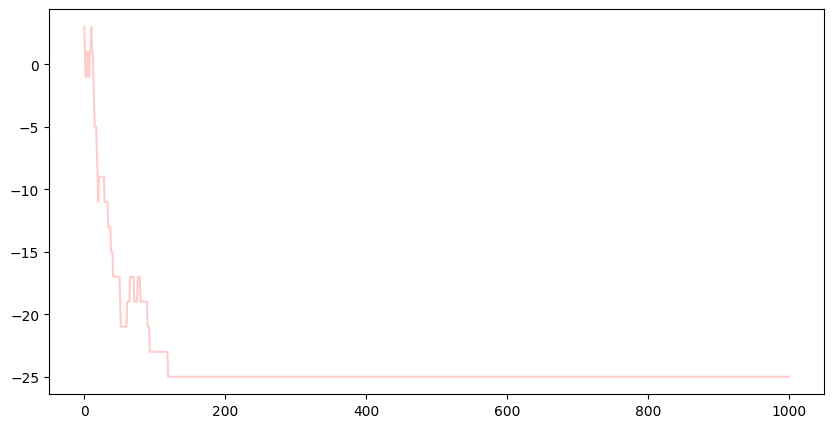

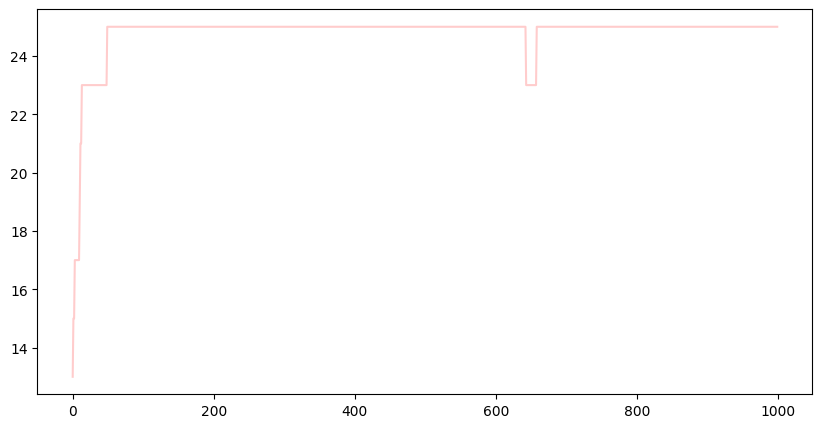

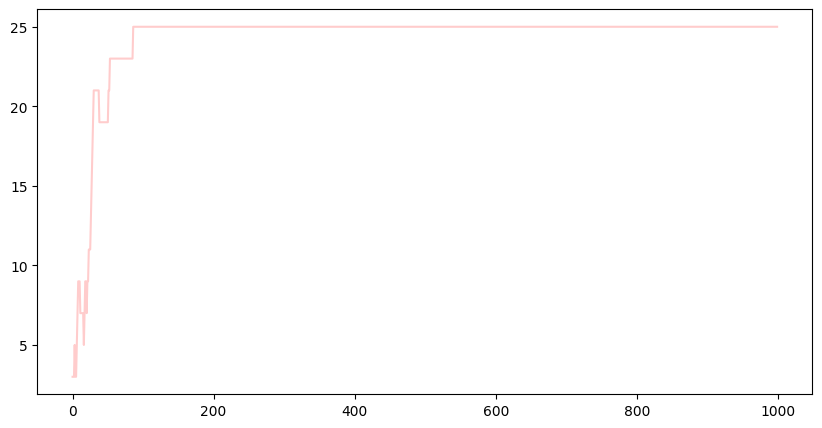

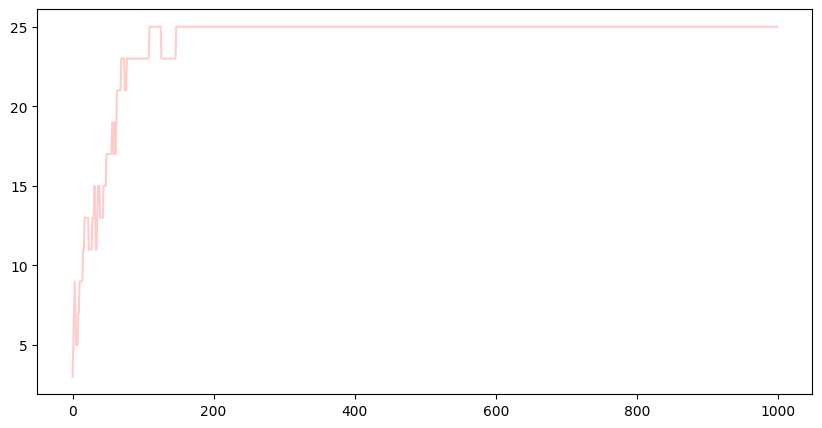

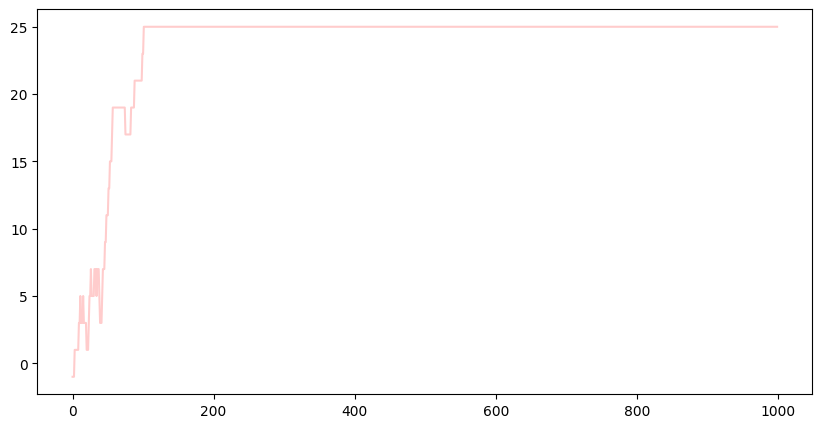

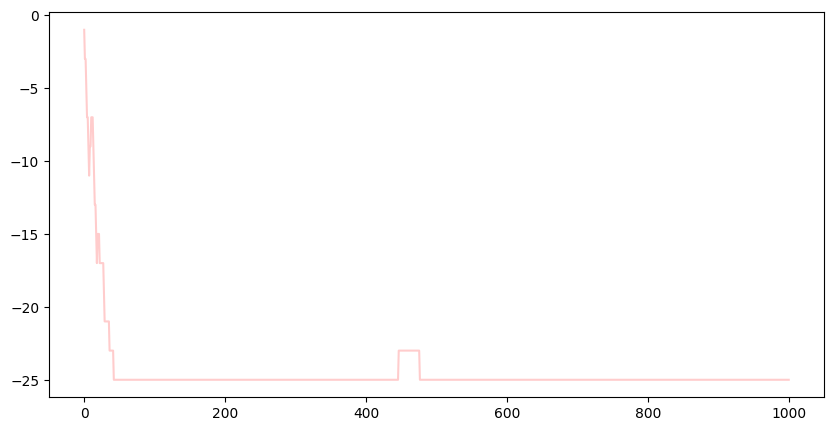

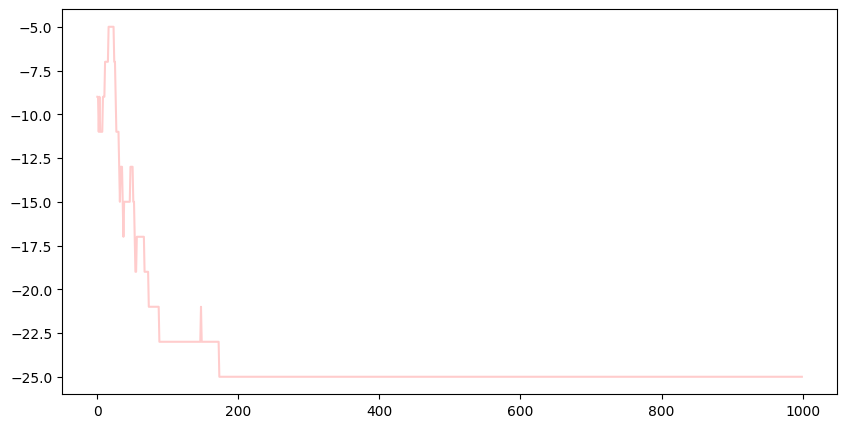

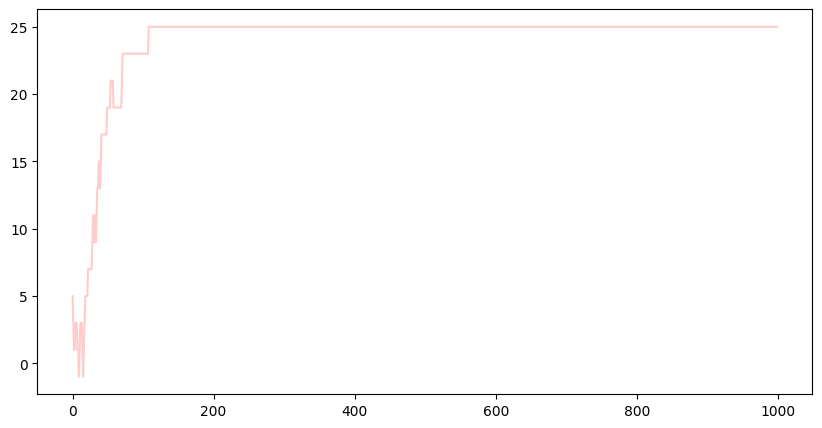

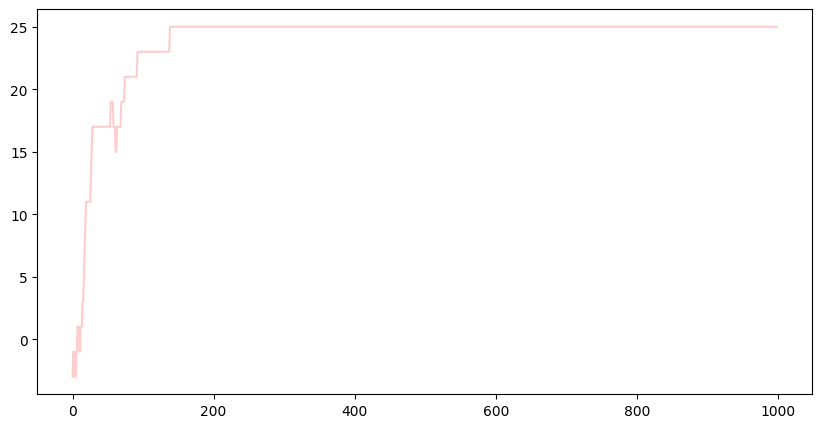

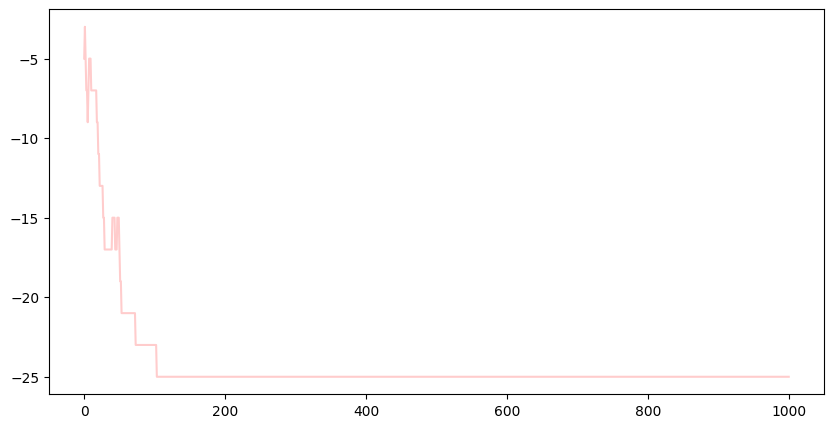

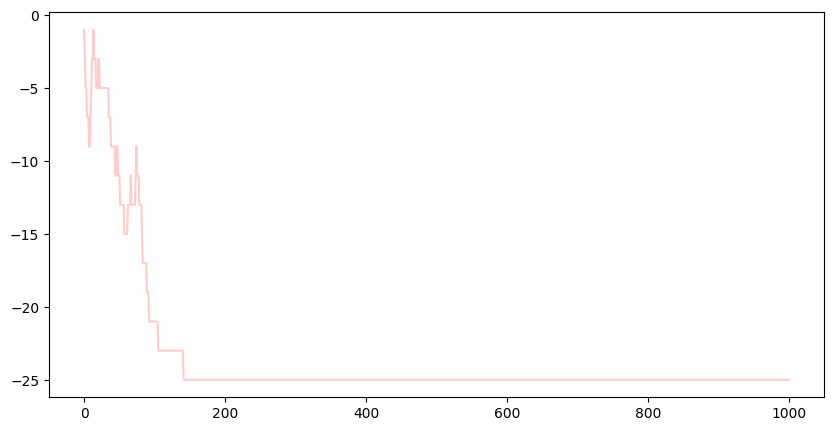

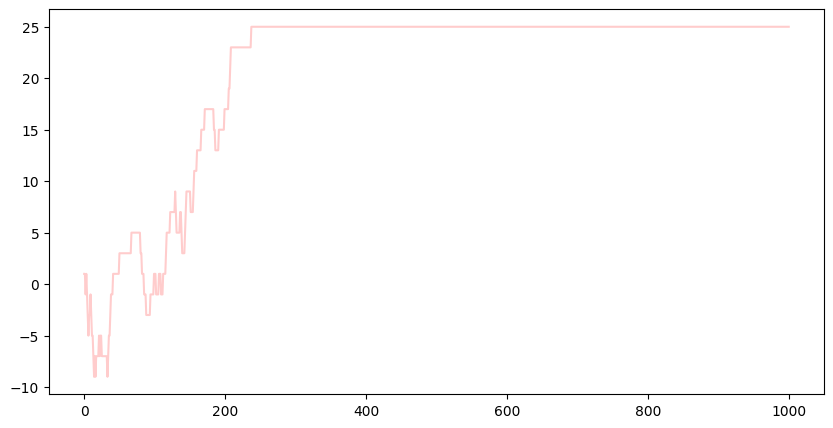

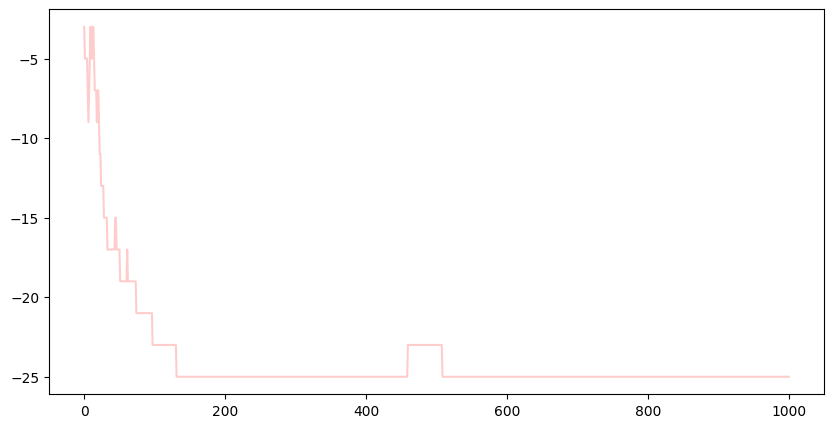

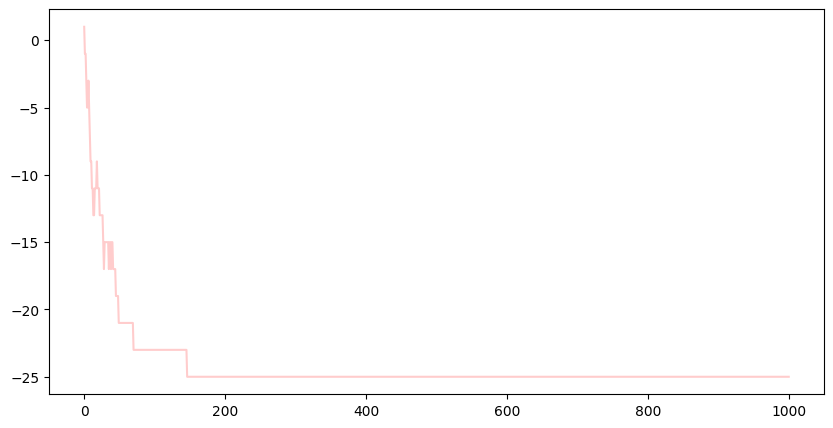

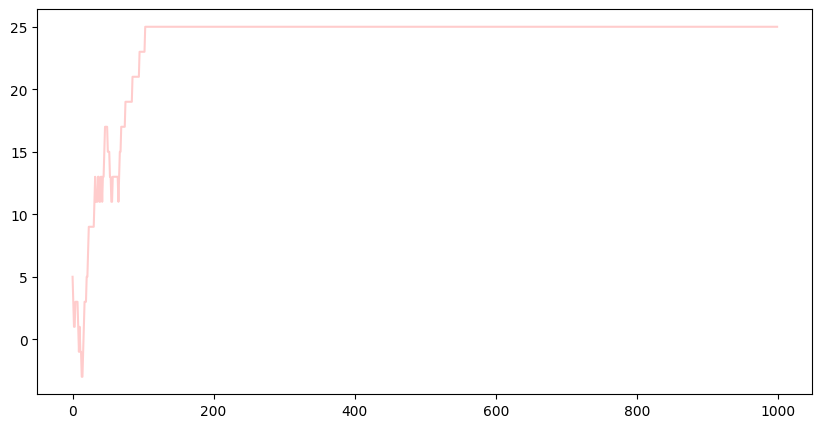

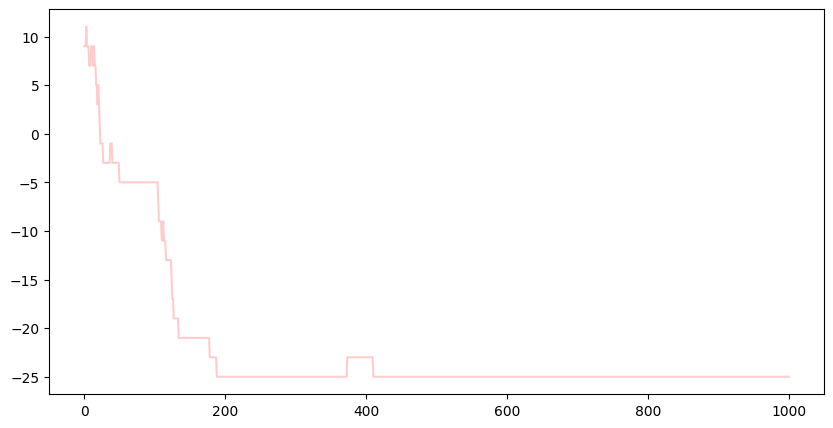

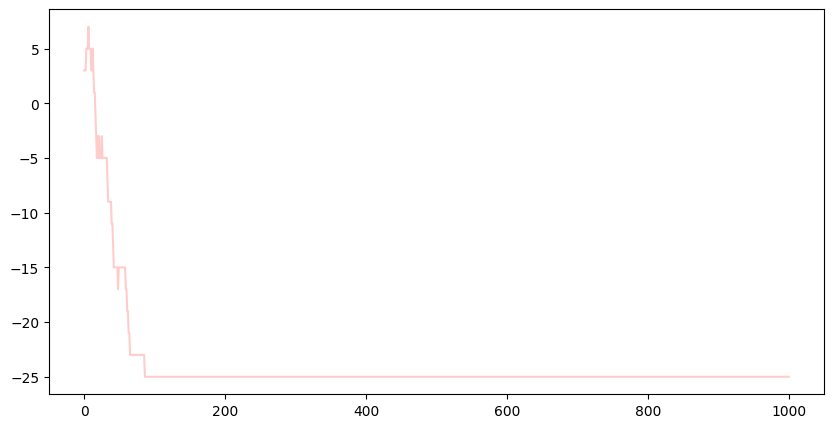

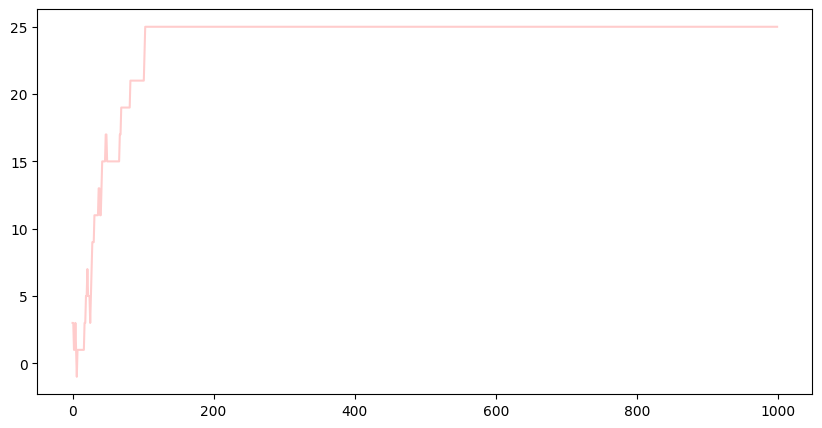

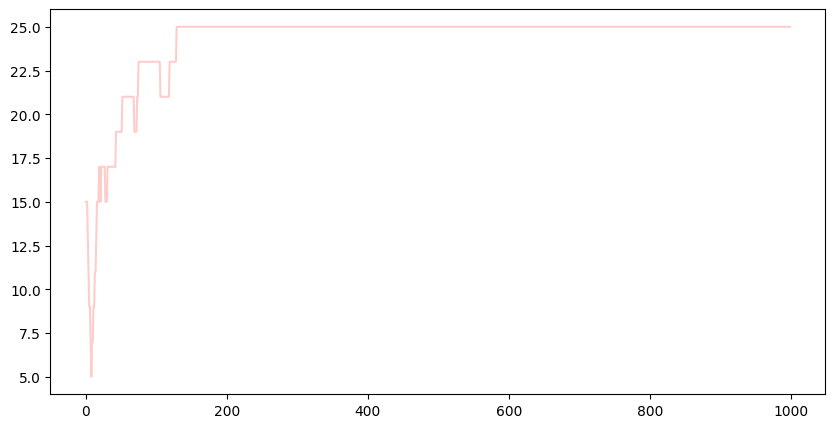

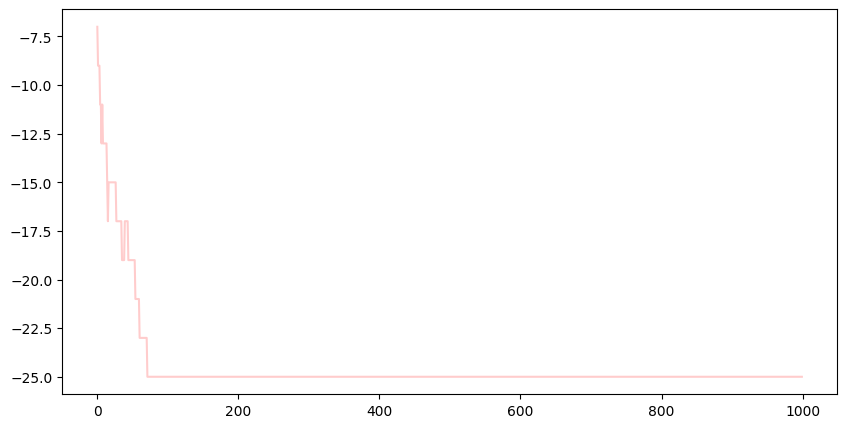

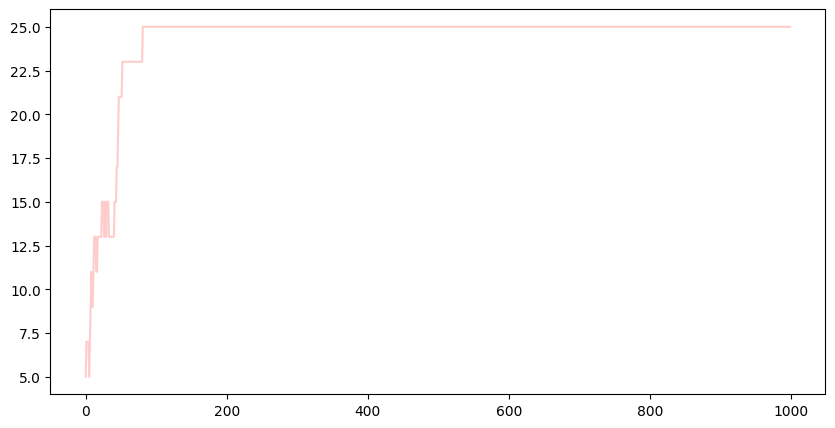

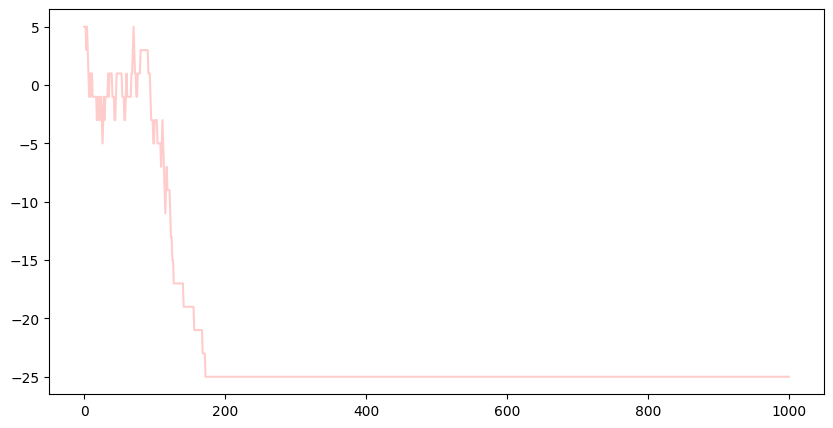

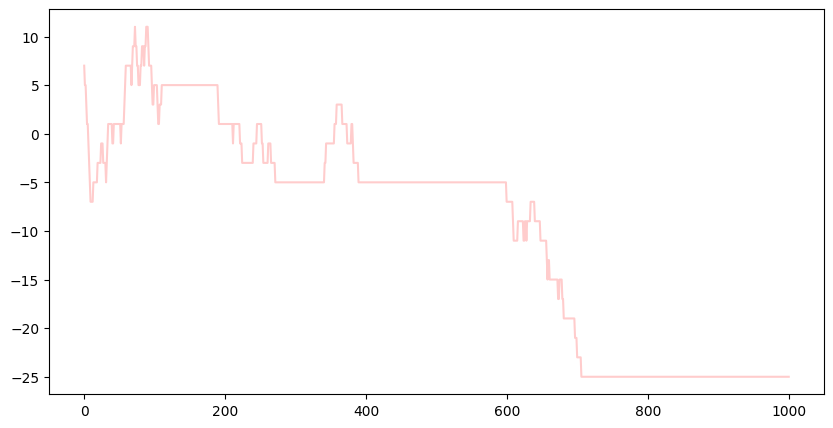

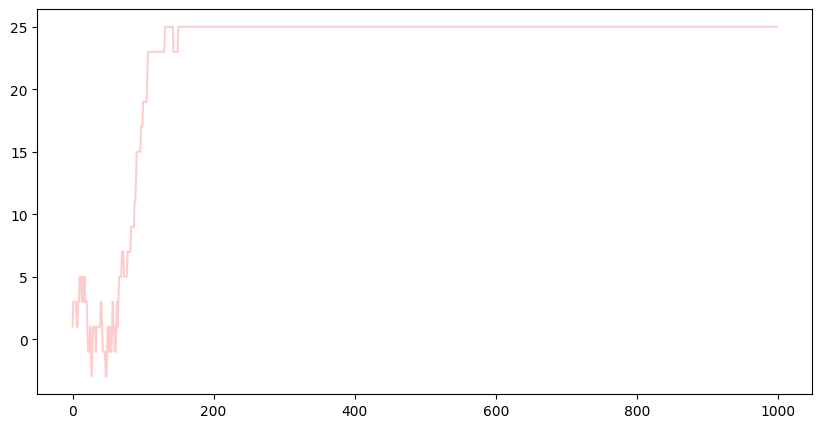

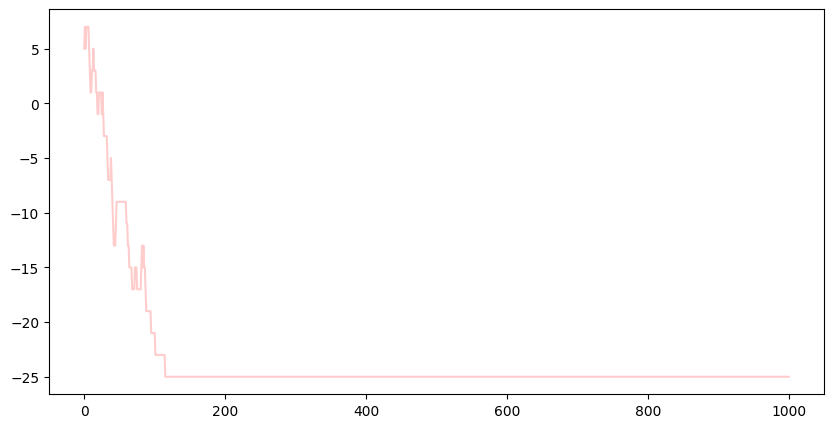

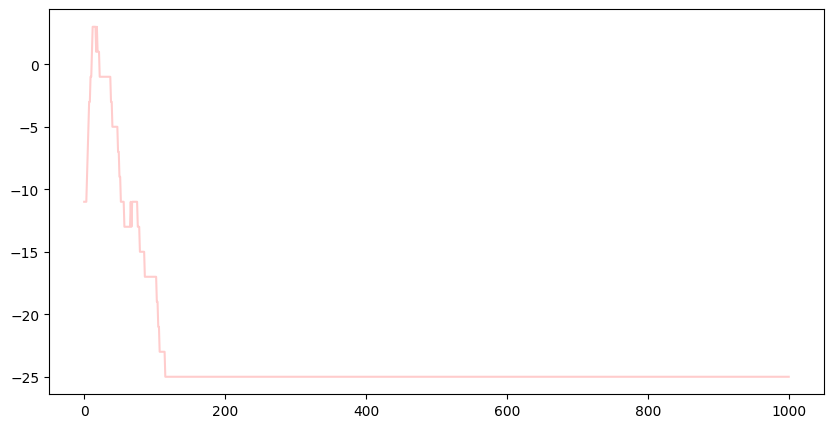

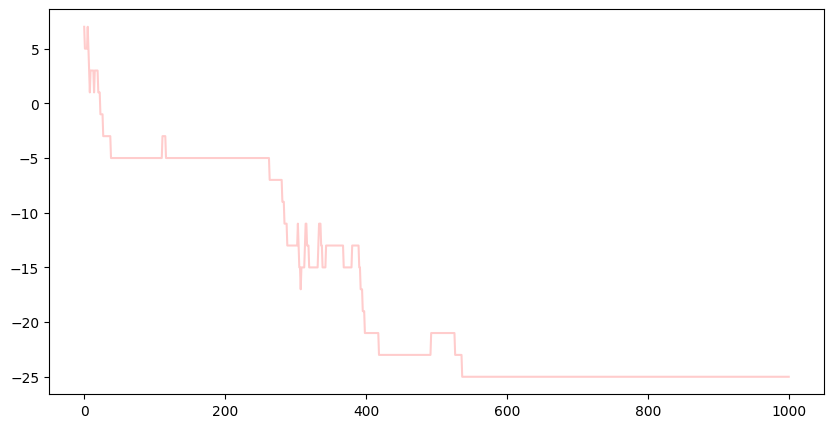

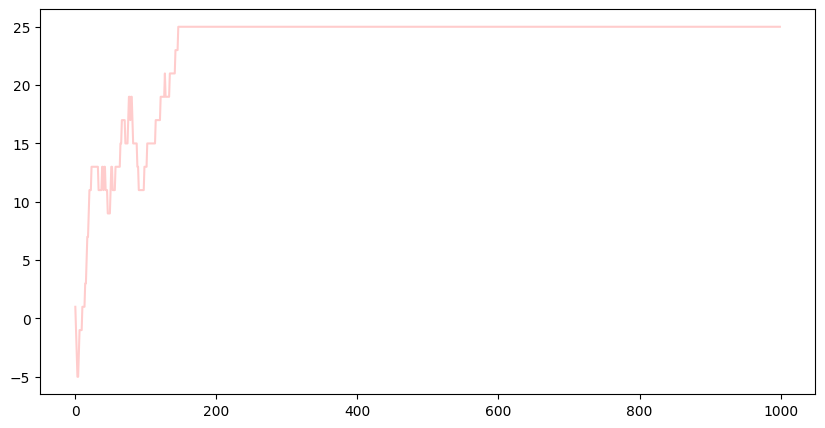

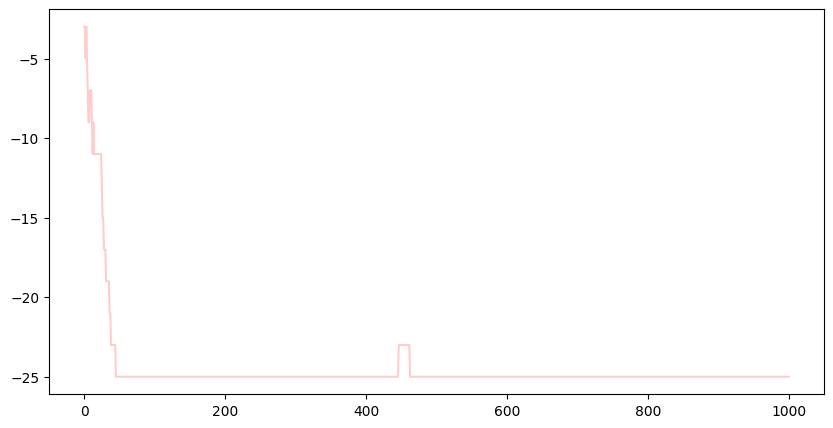

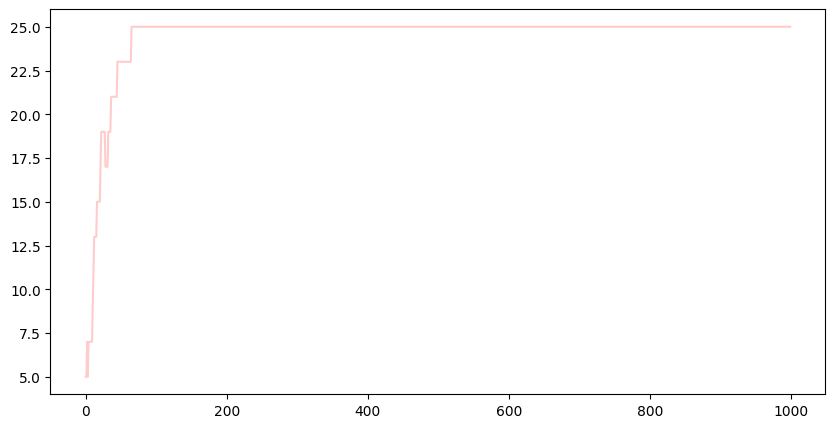

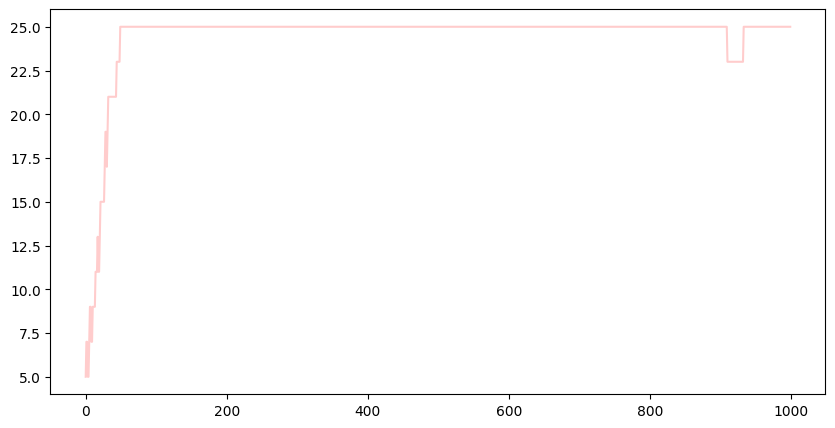

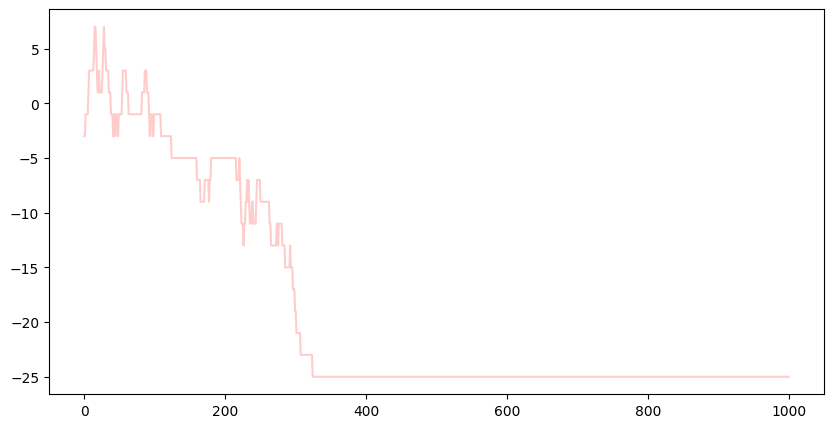

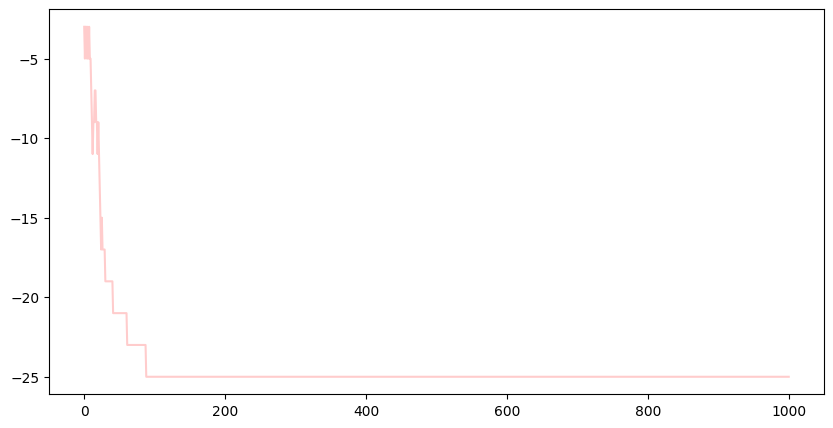

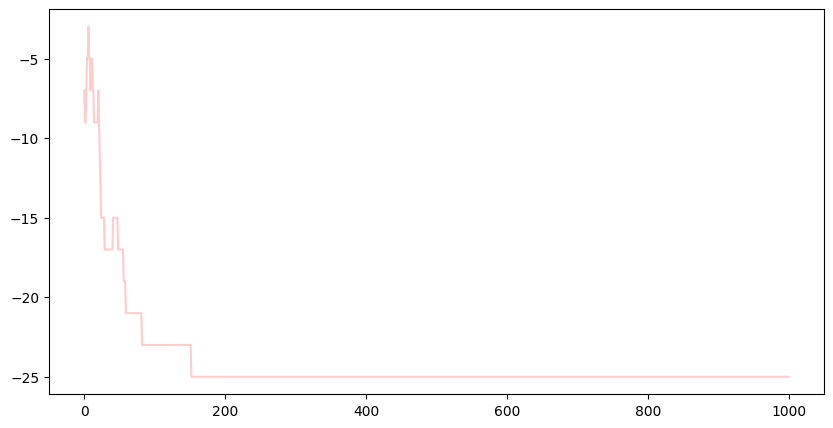

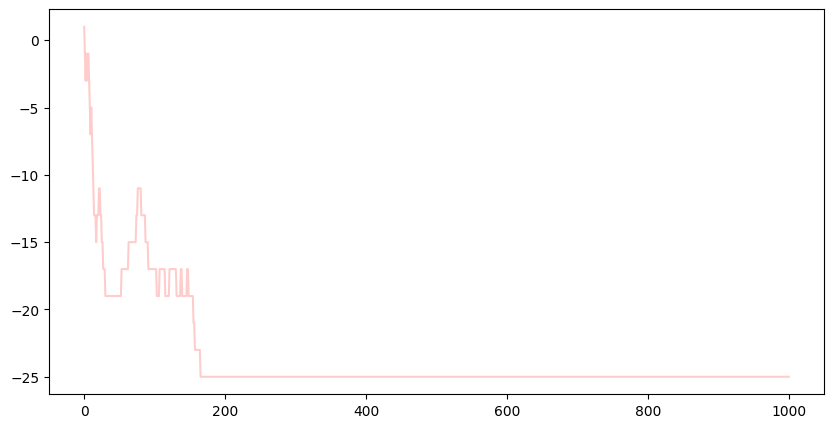

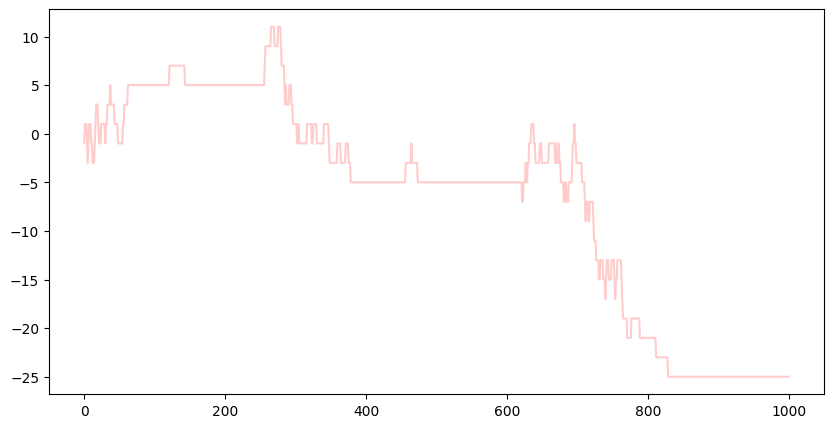

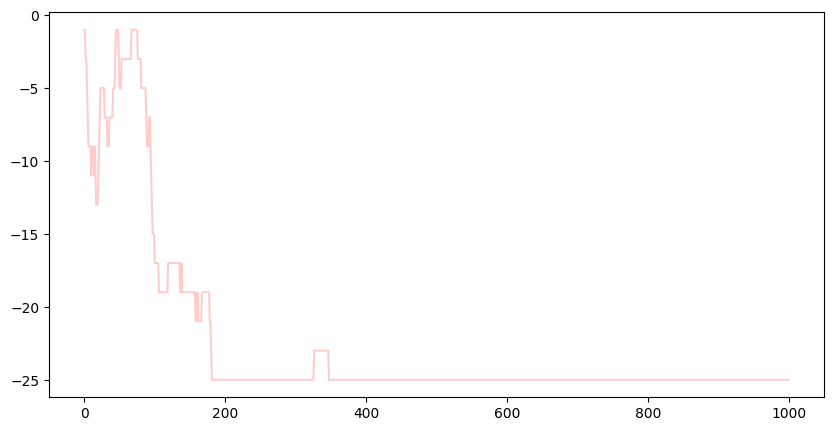

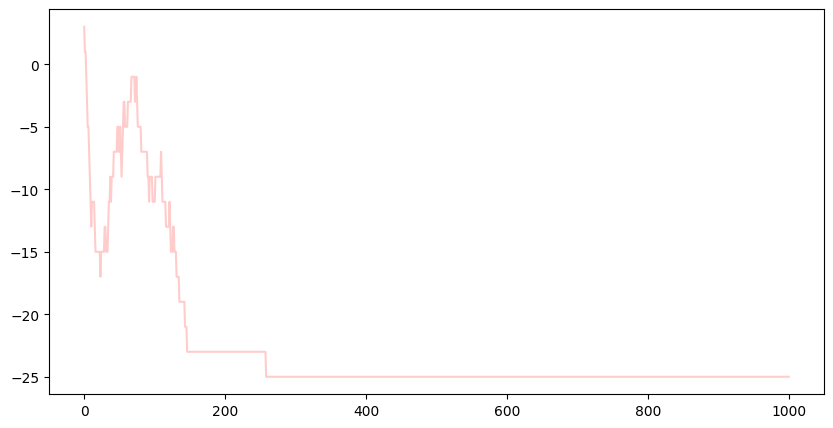

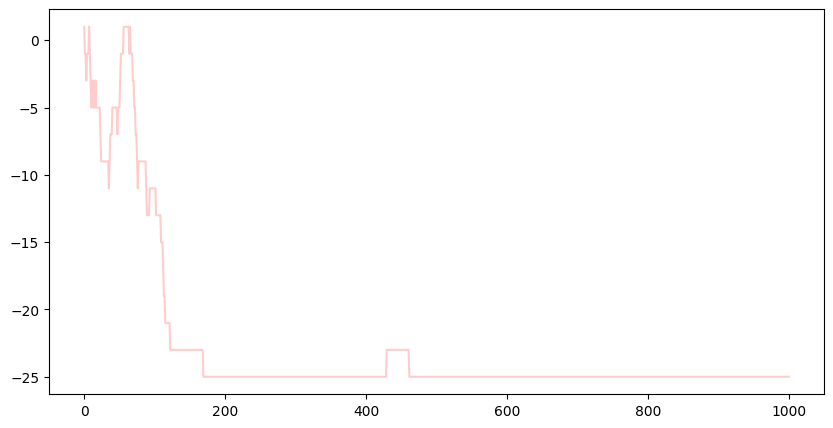

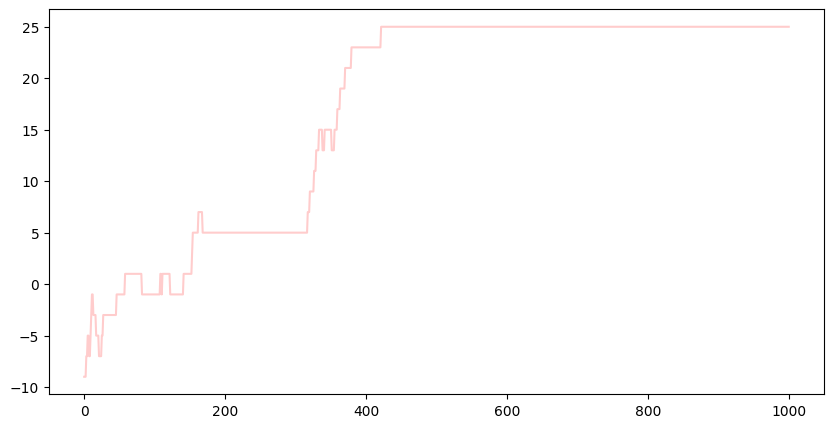

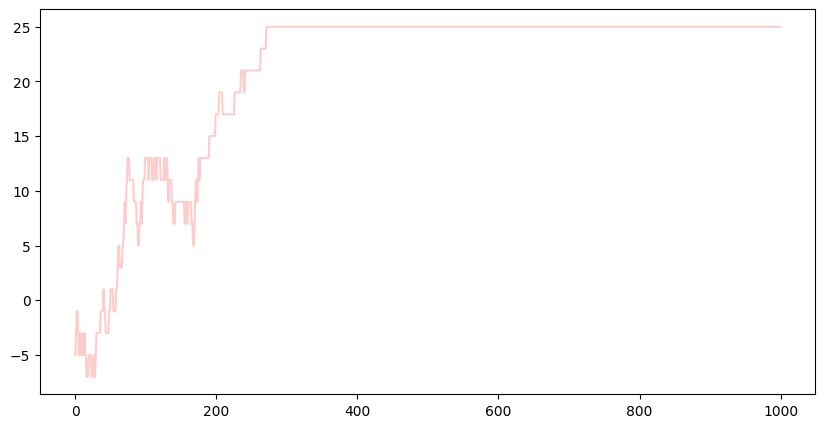

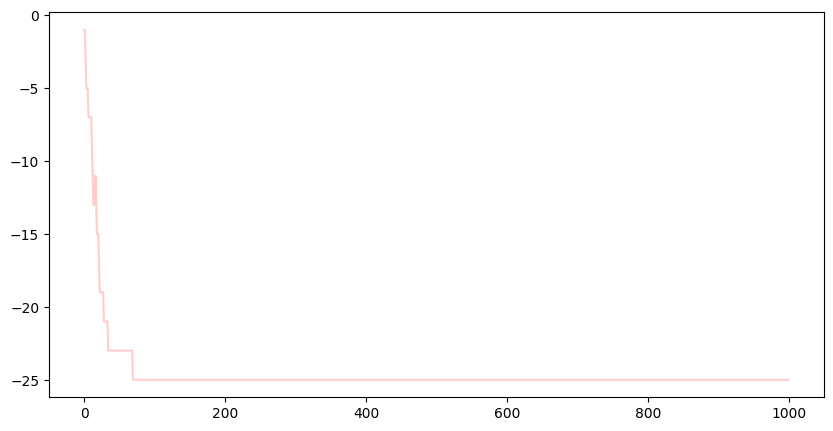

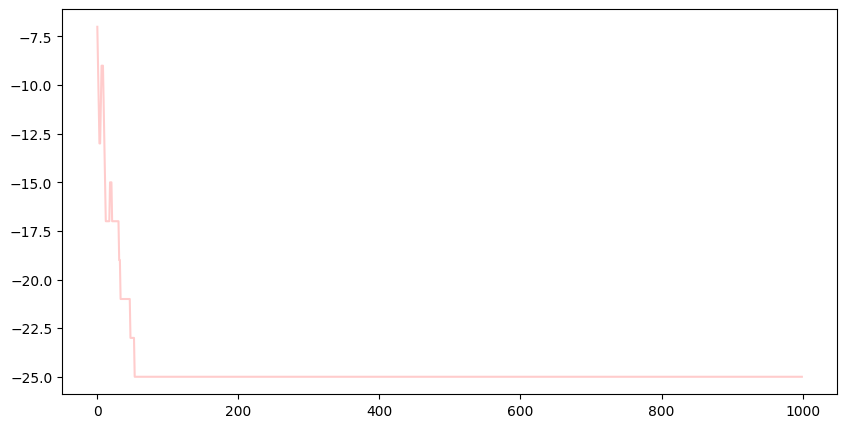

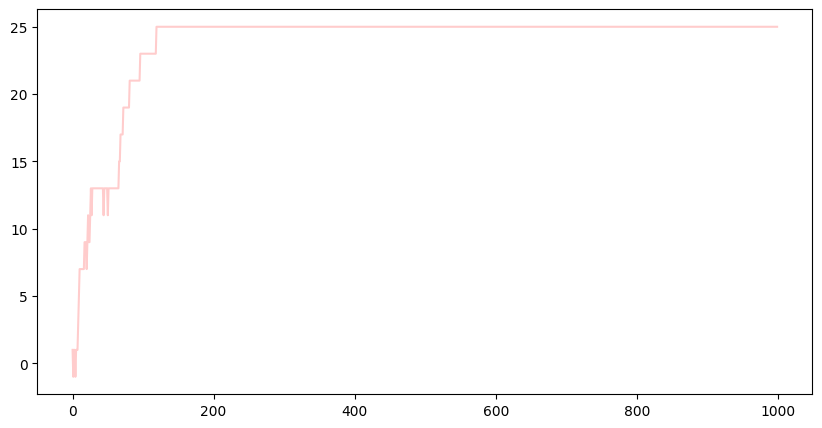

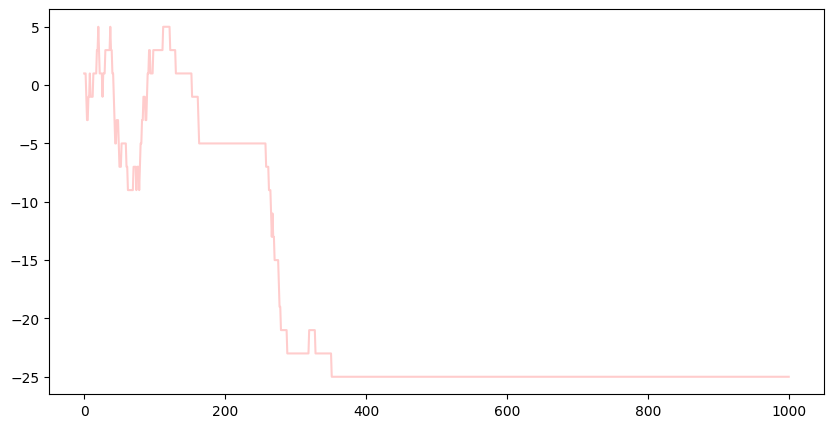

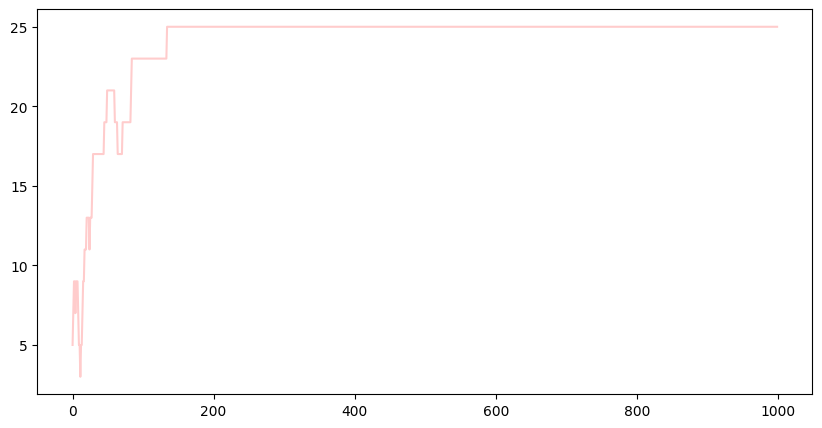

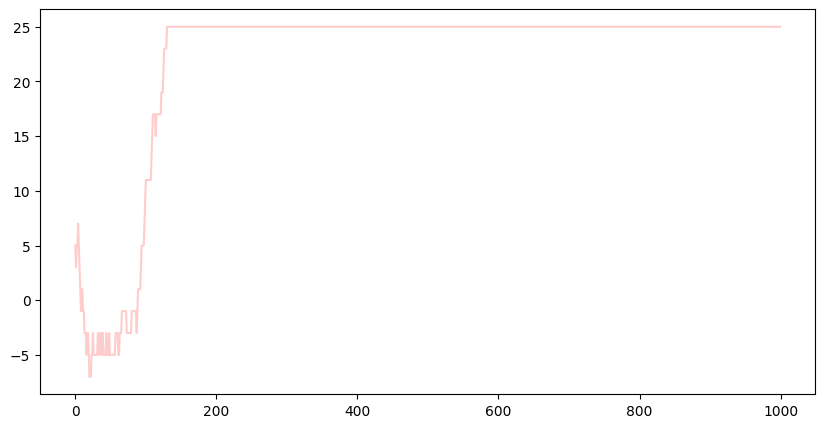

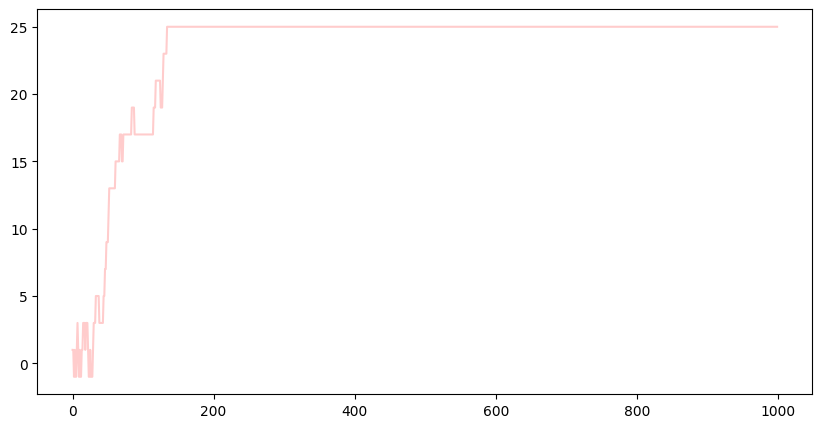

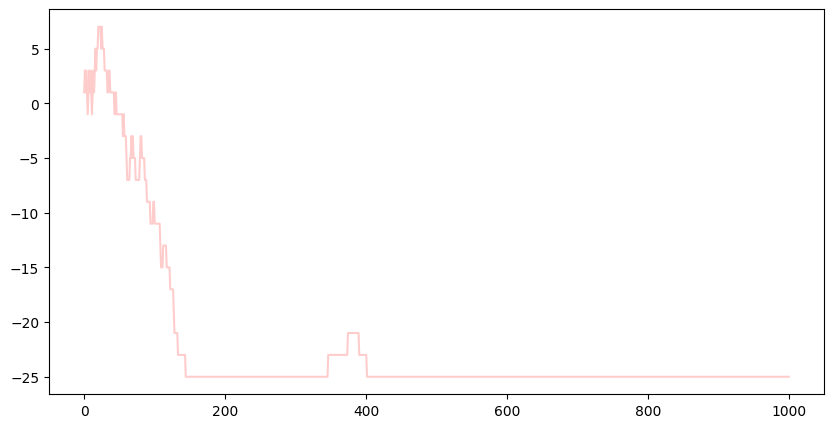

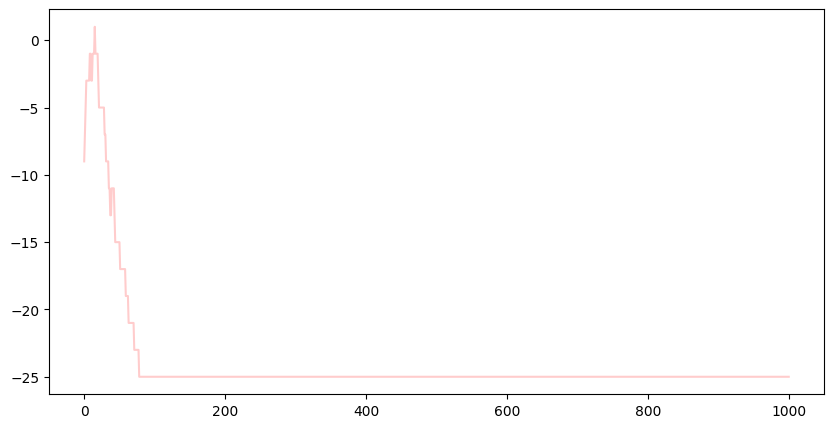

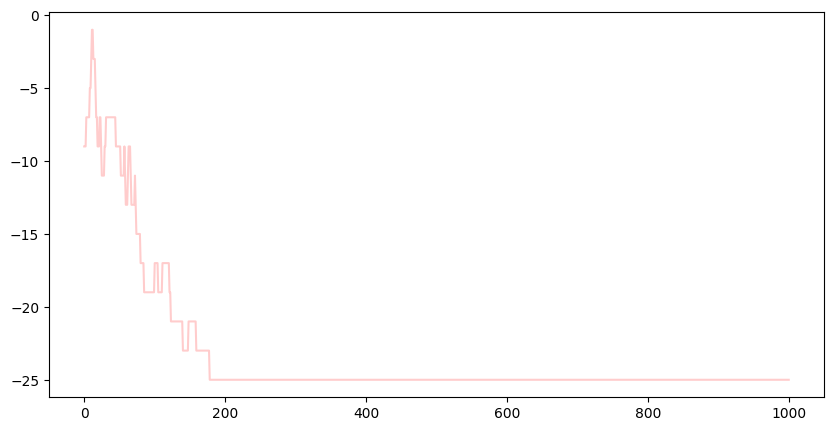

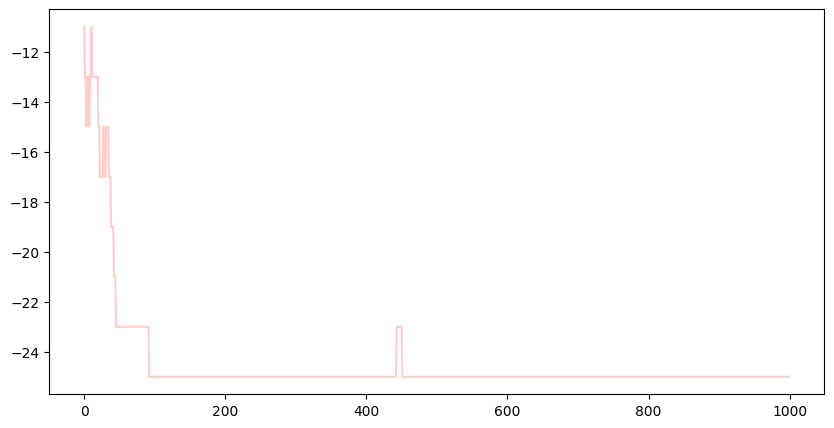

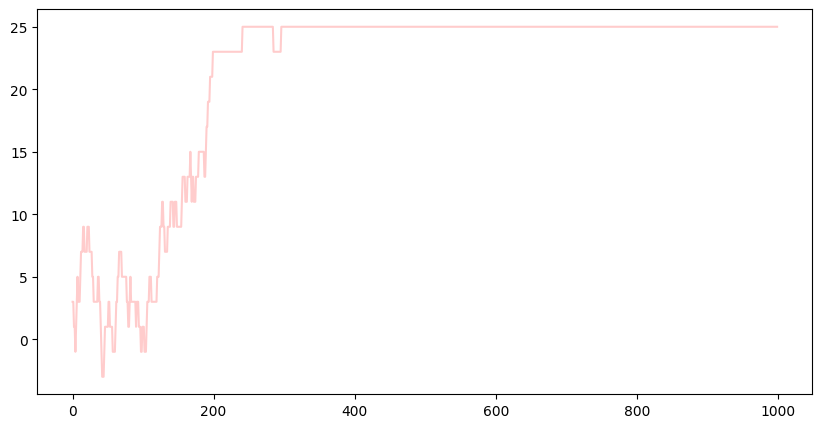

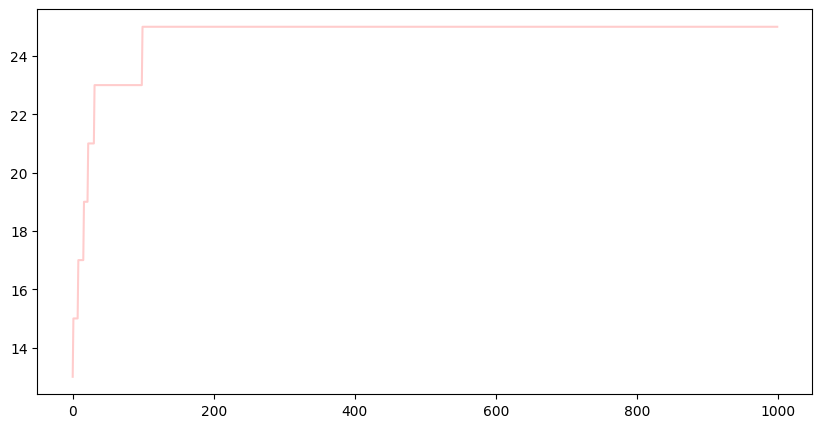

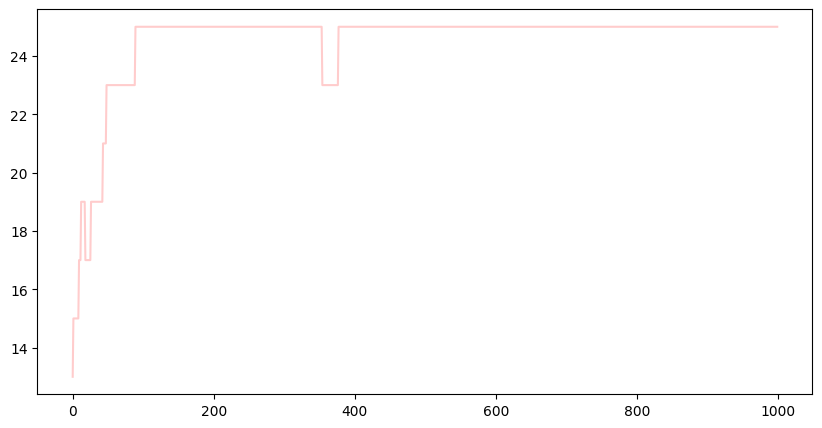

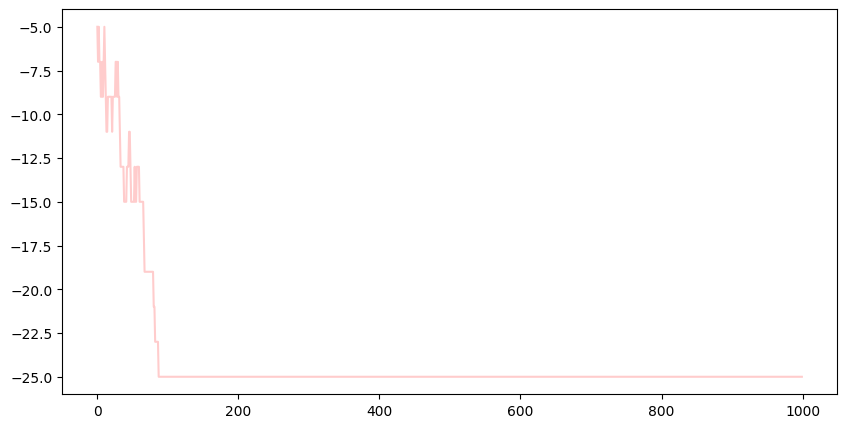

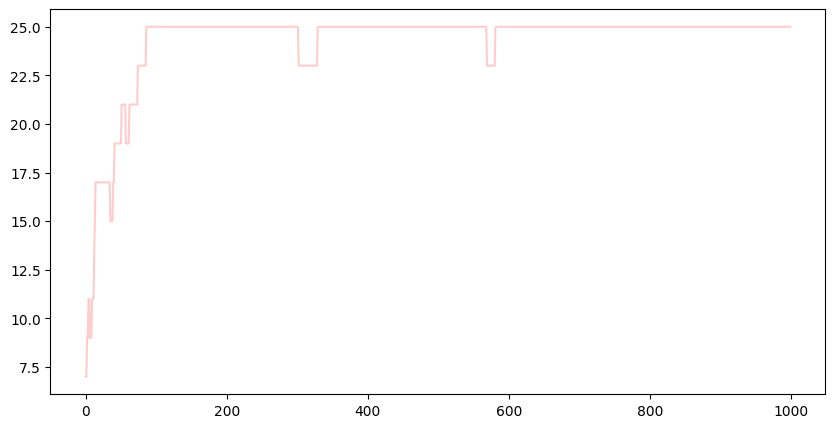

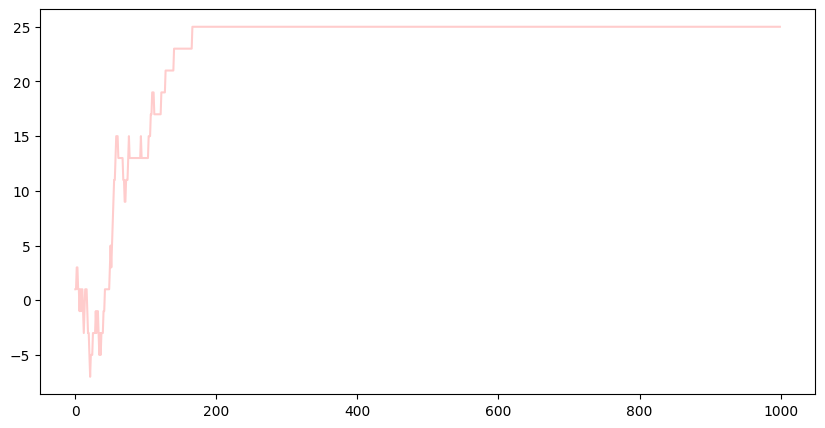

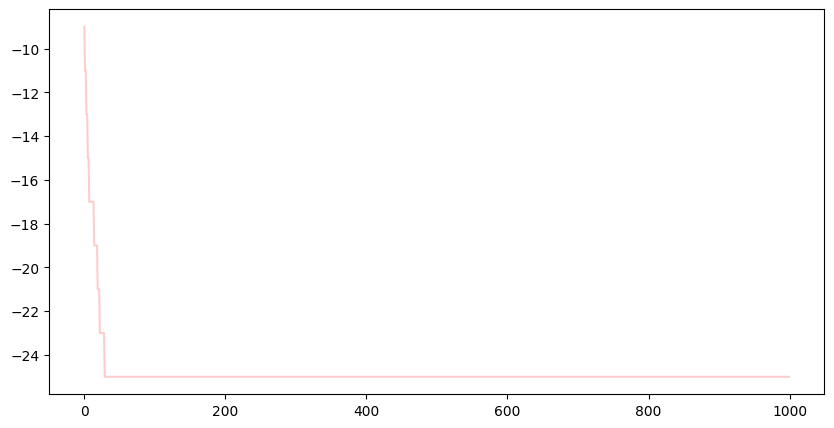

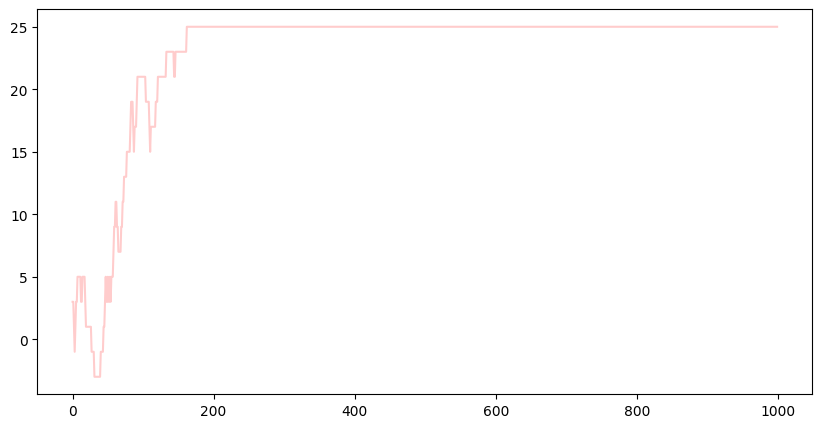

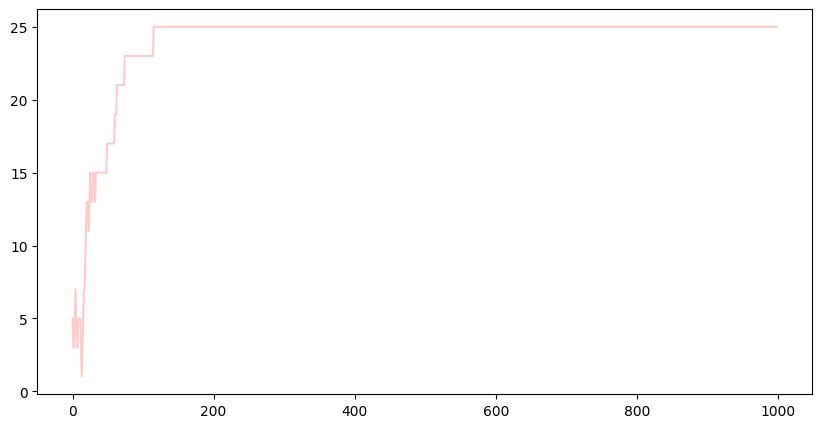

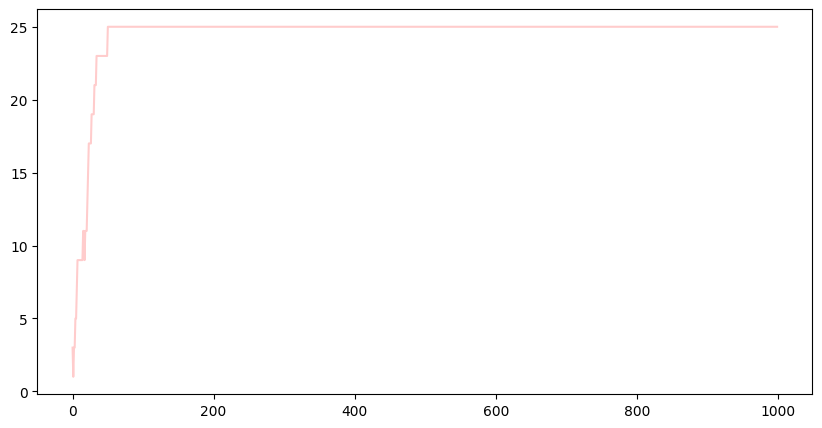

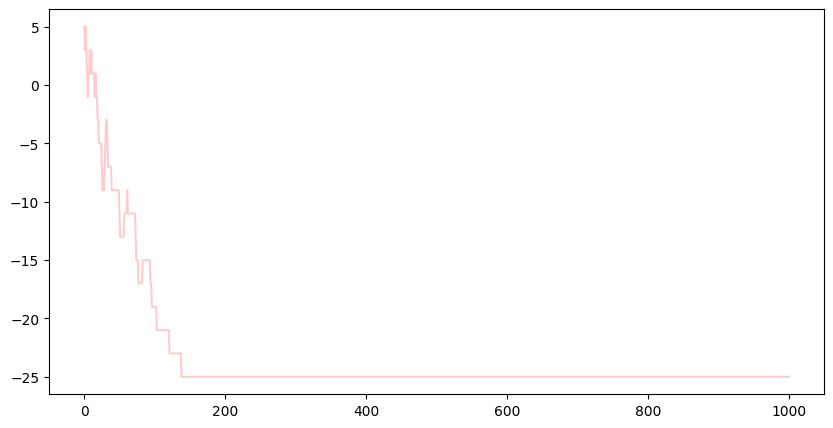

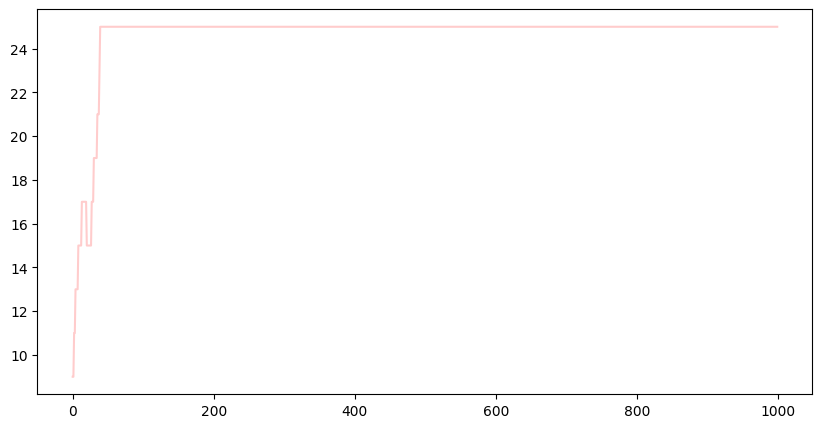

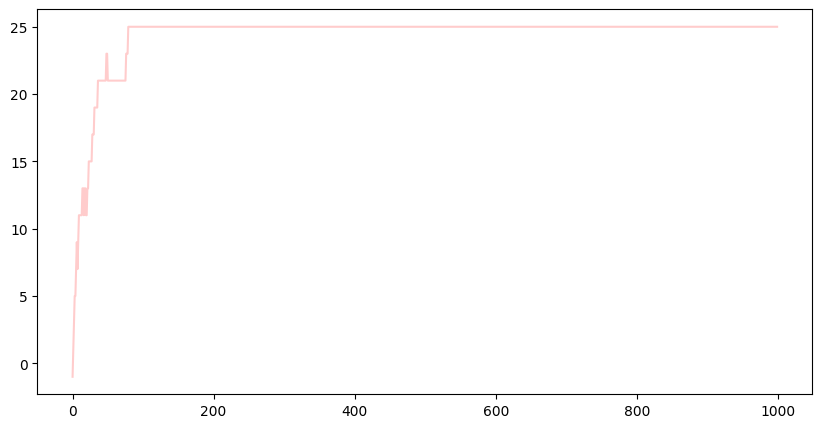

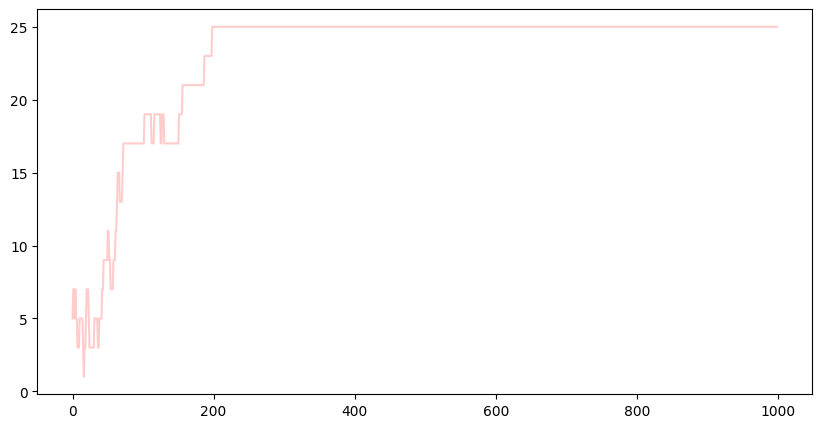

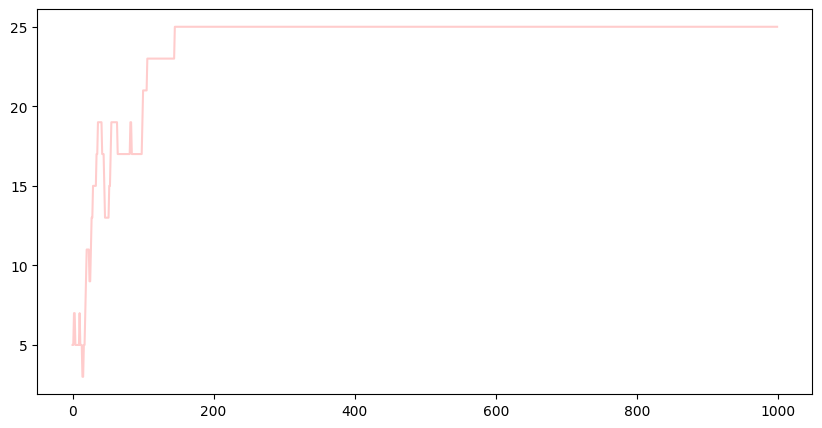

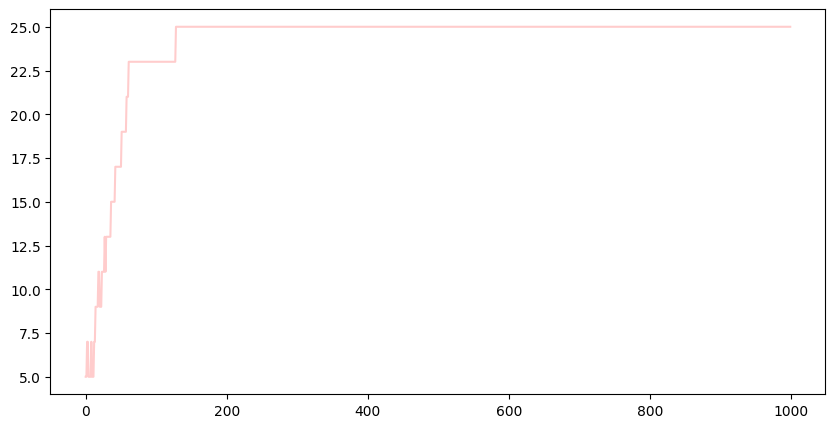

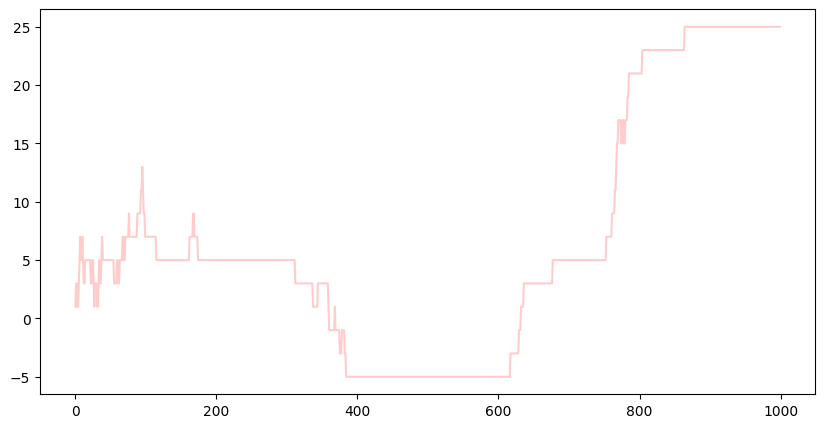

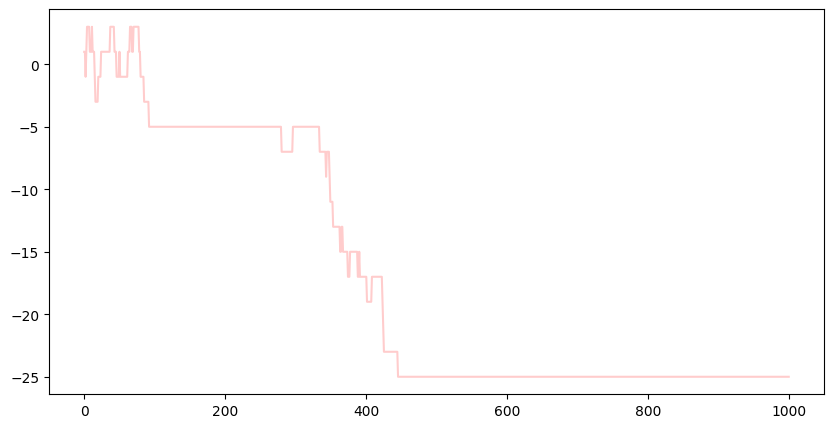

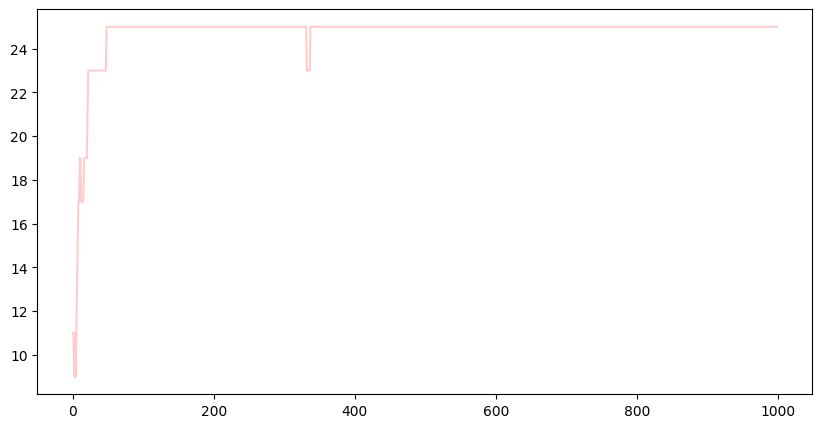

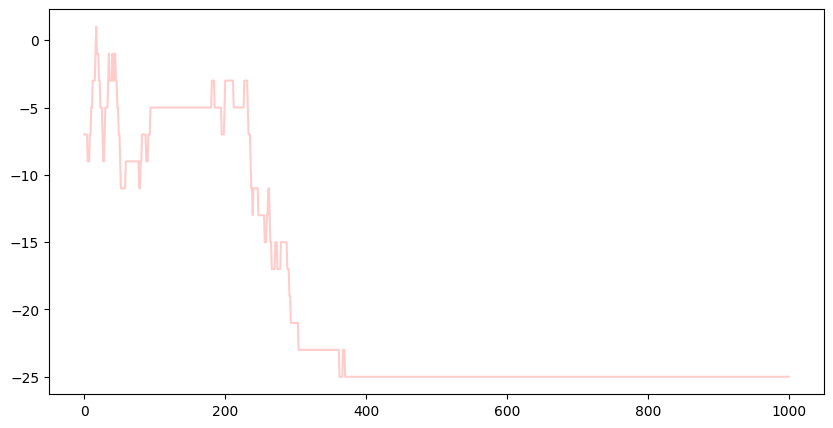

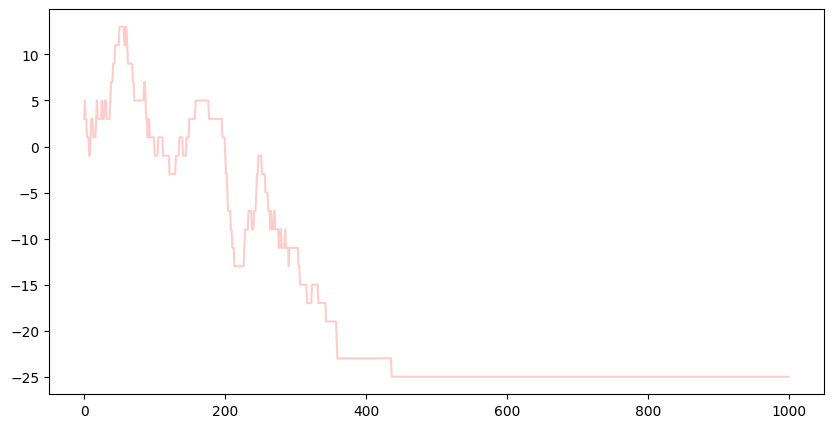

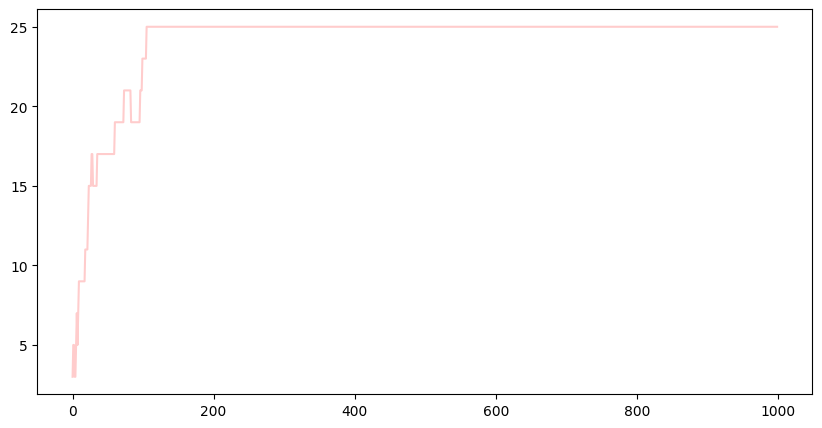

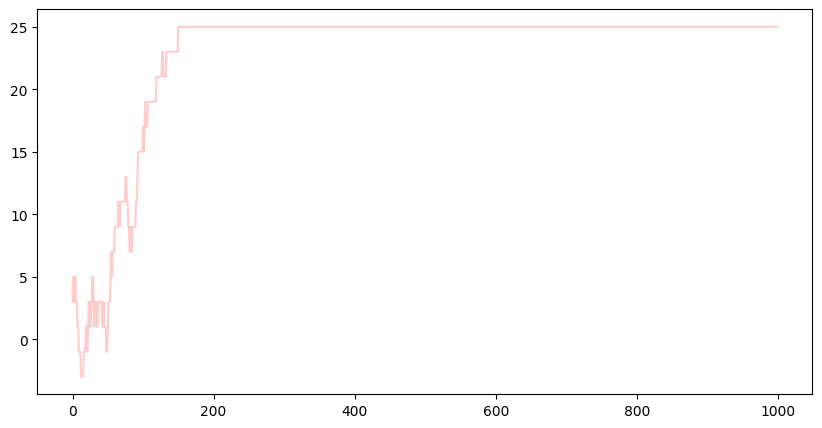

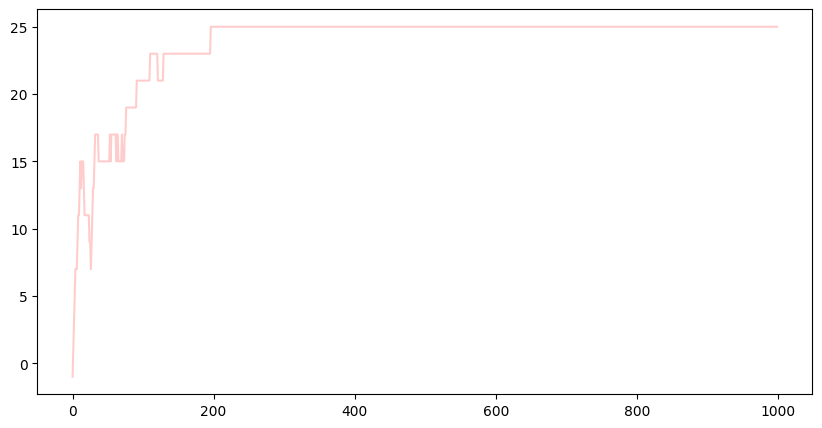

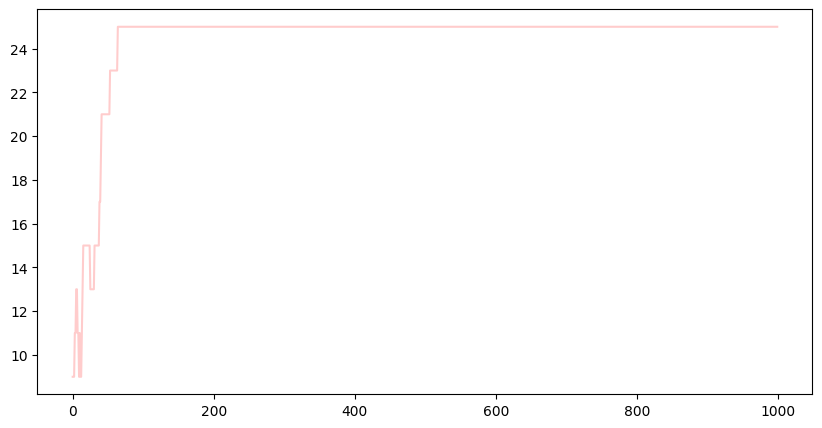

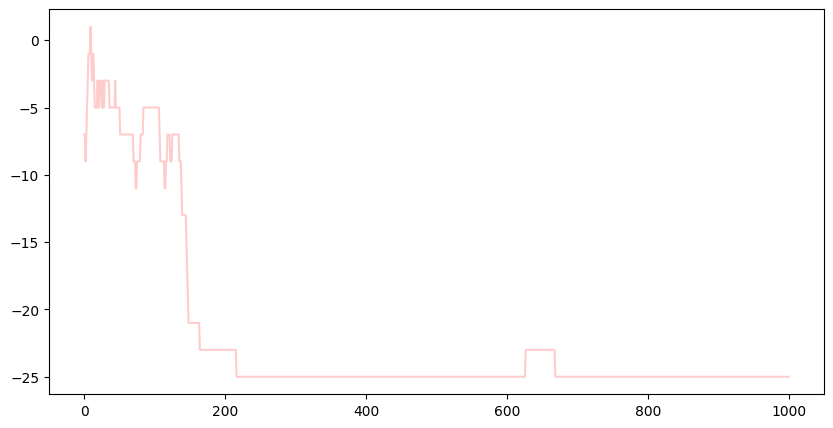

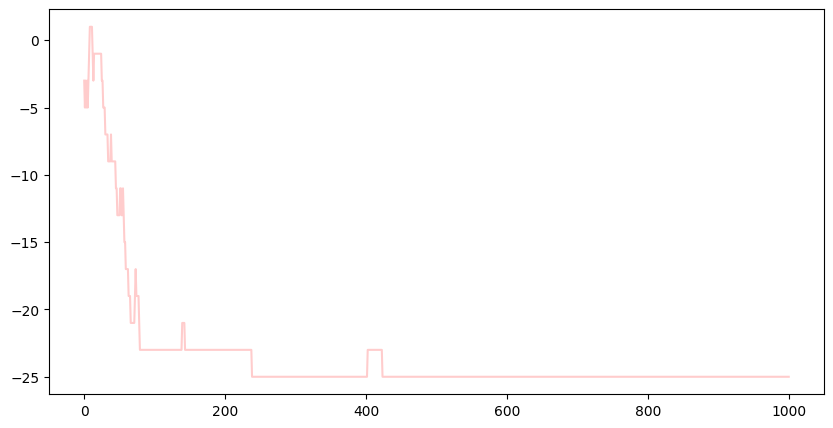

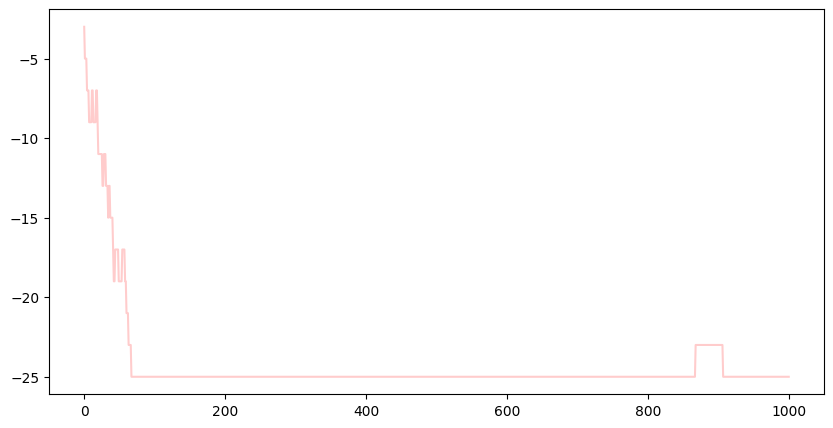

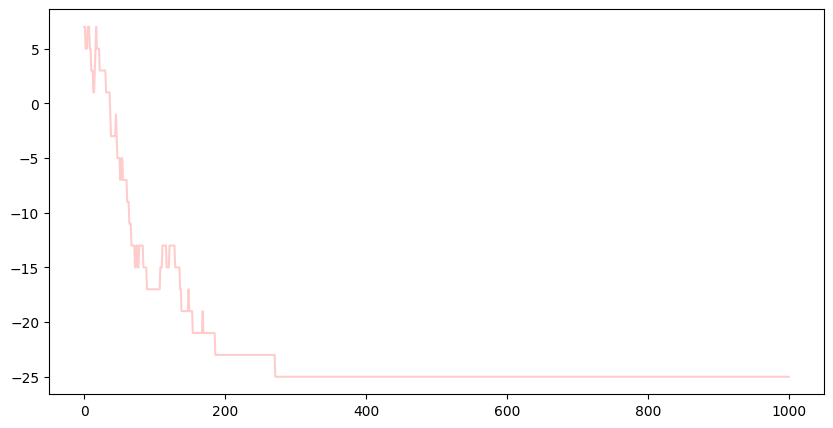

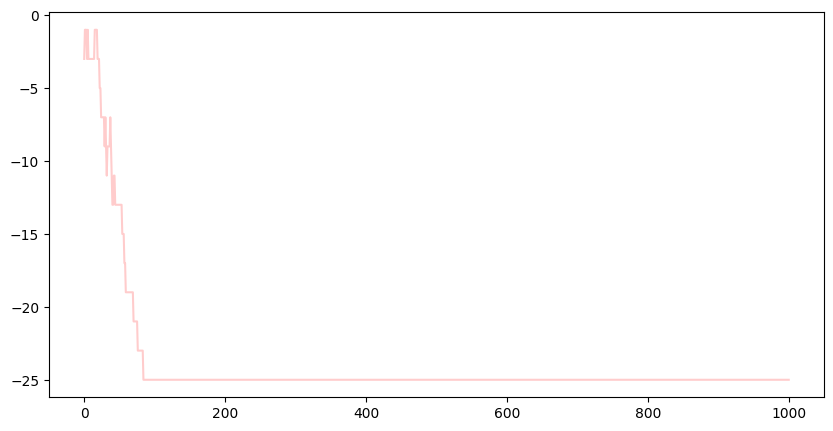

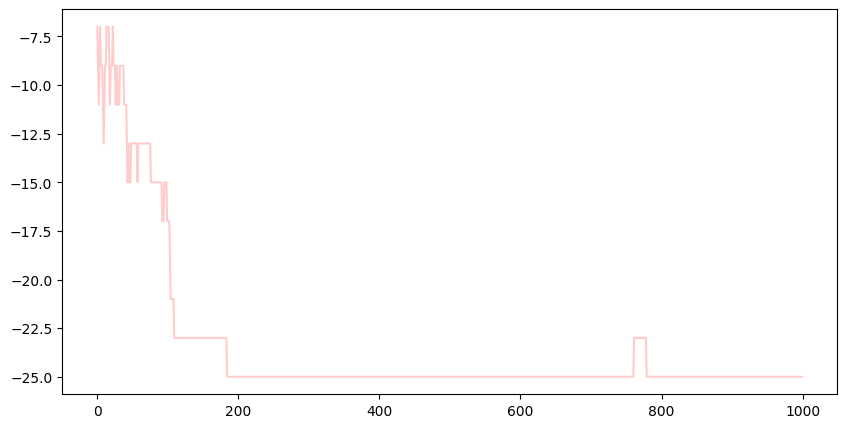

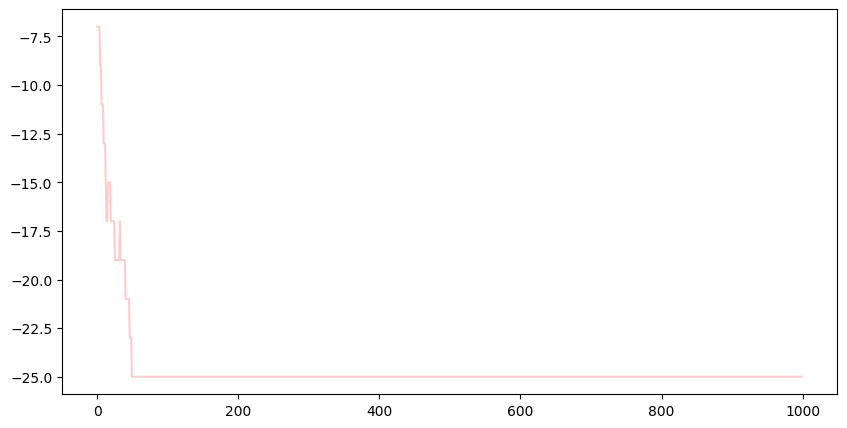

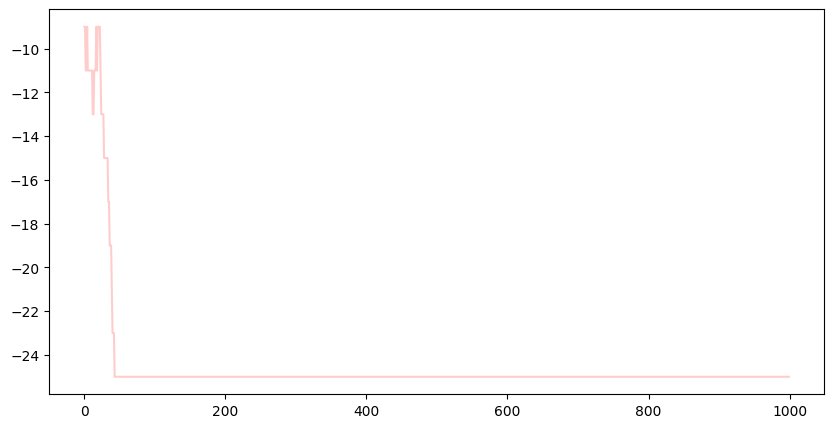

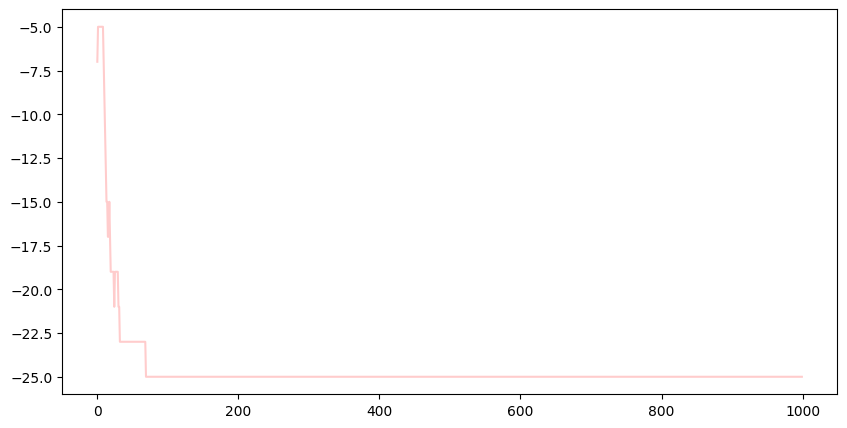

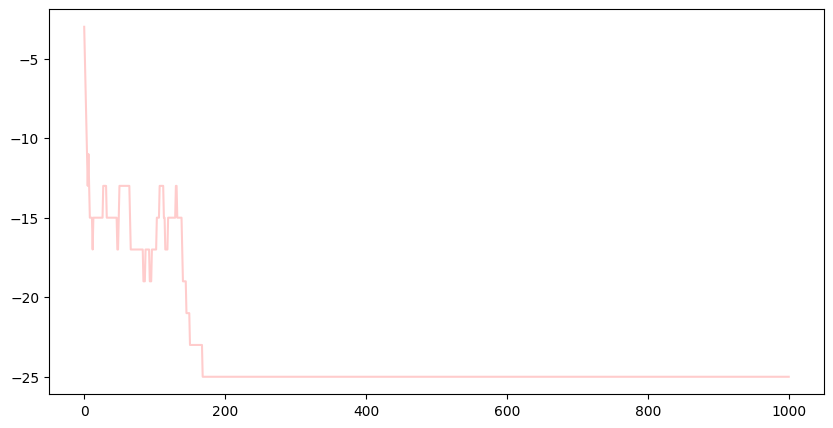

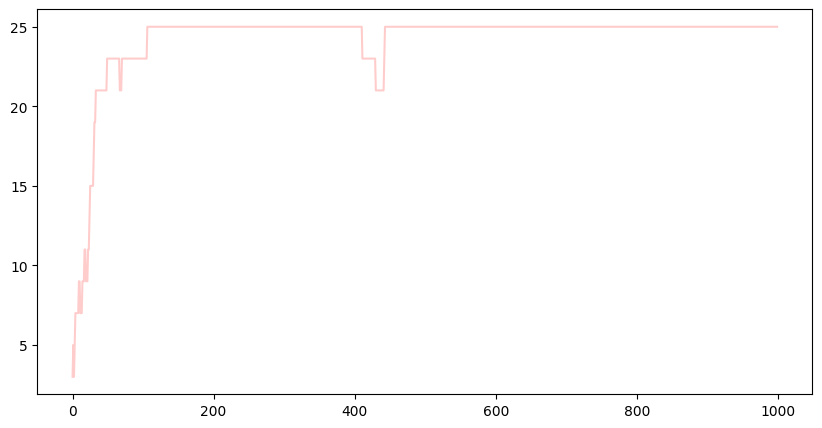

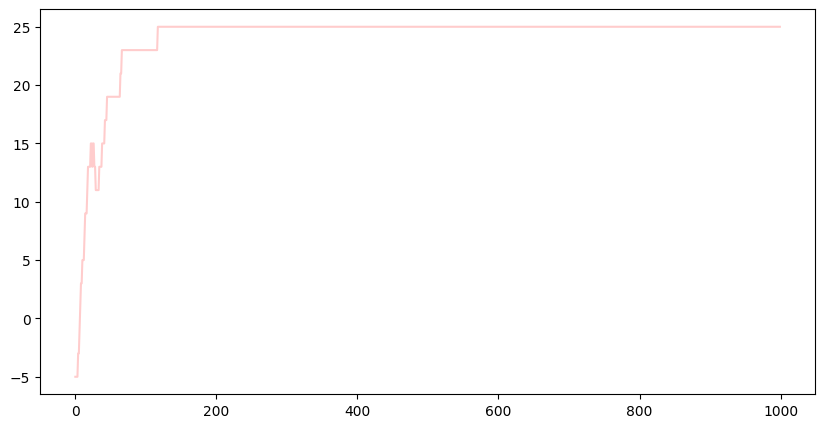

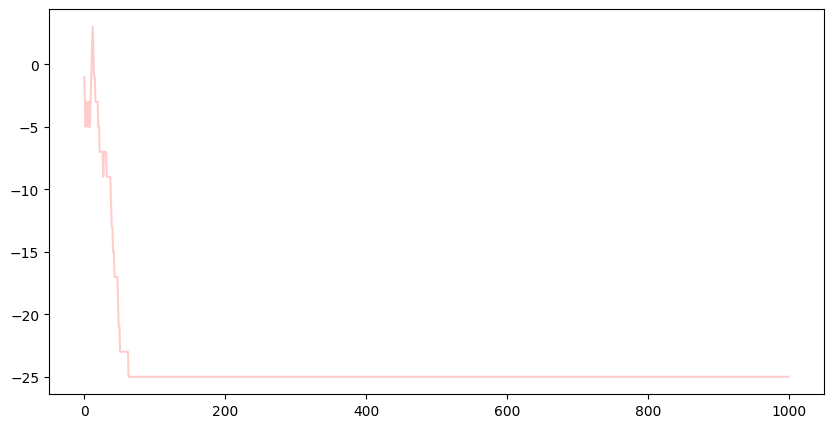

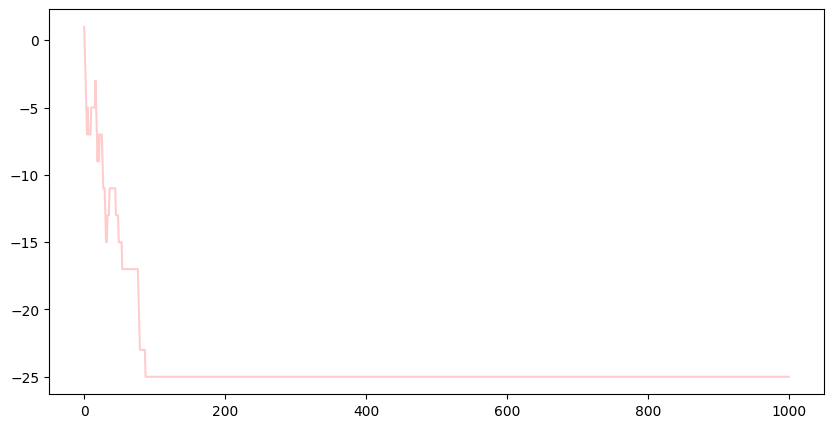

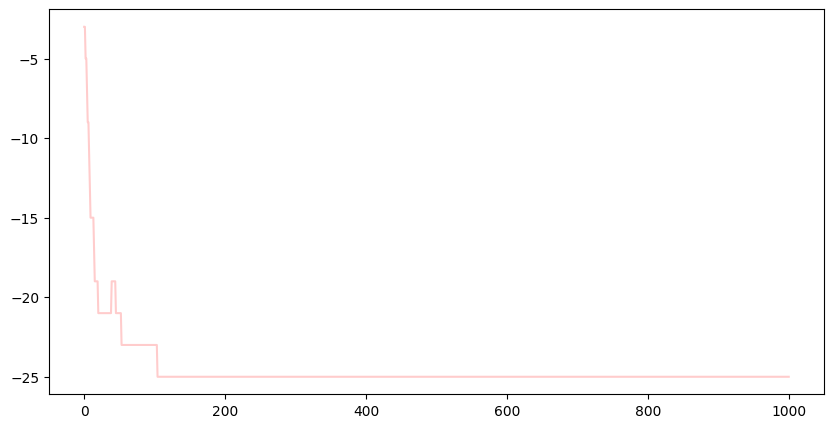

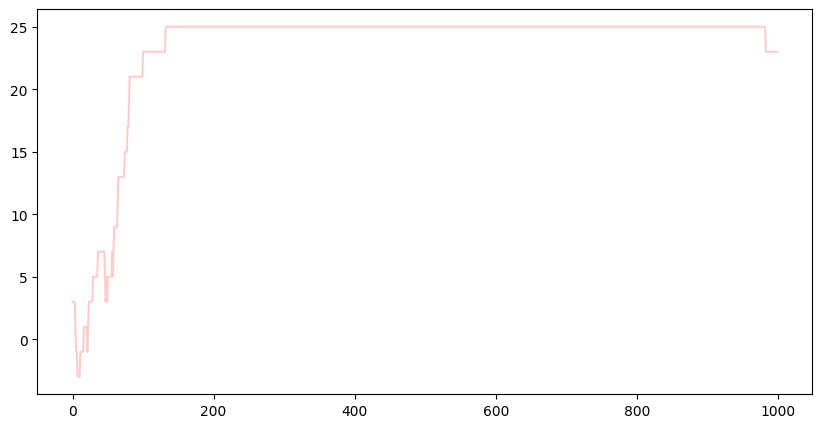

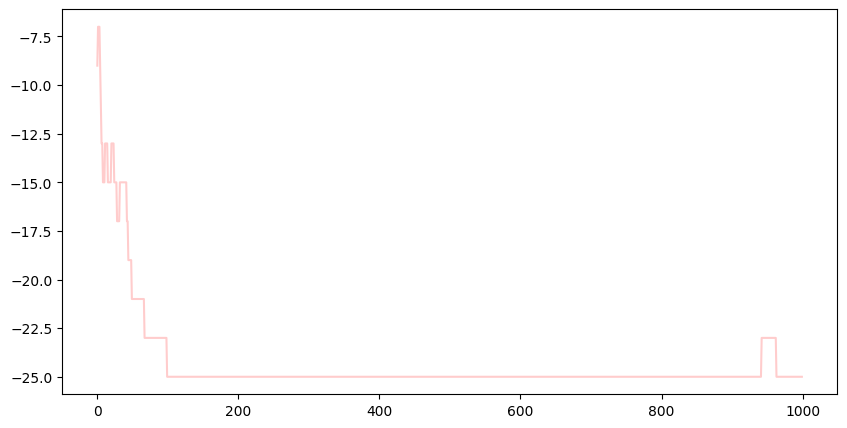

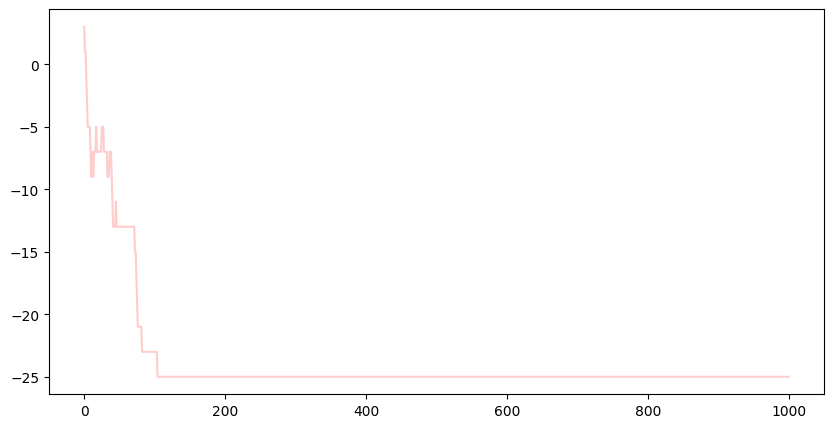

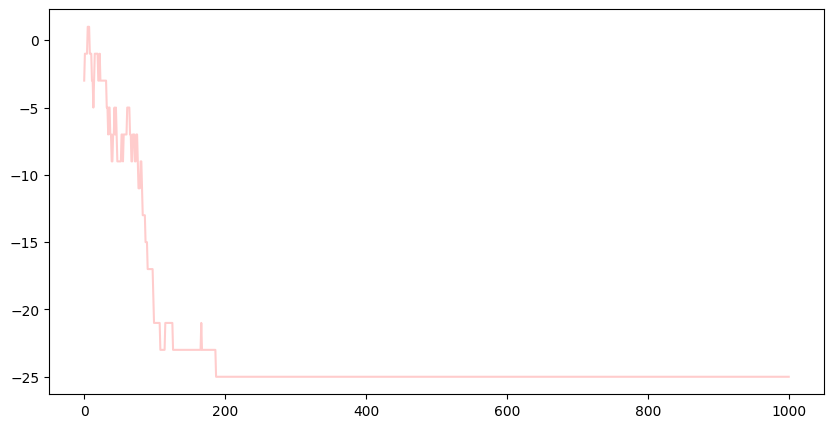

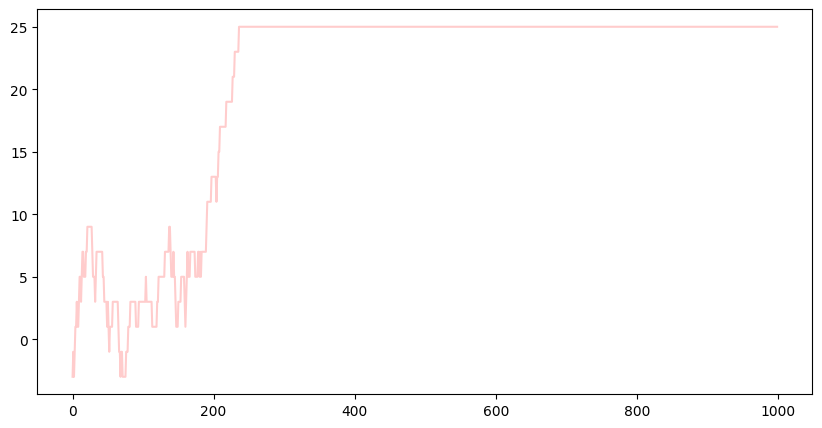

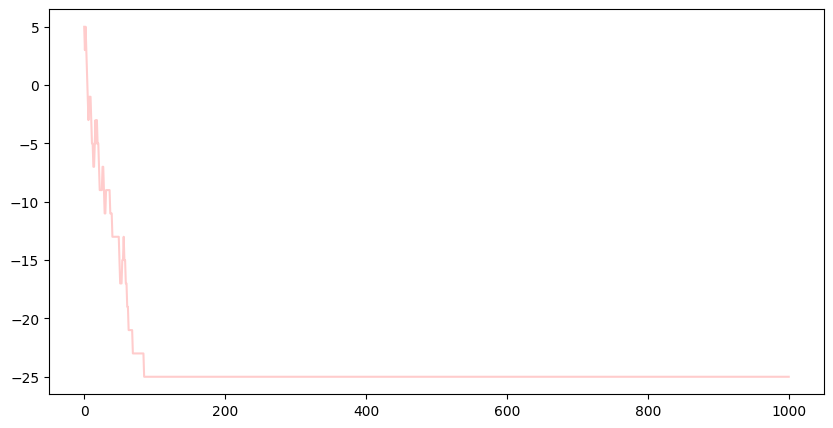

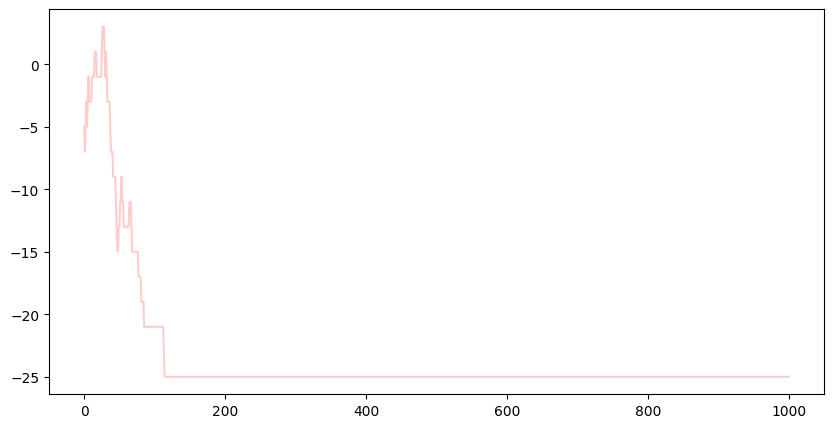

In [40]:
for mh in results:
    plt.plot(mh,'r', alpha=0.2)
    plt.show()

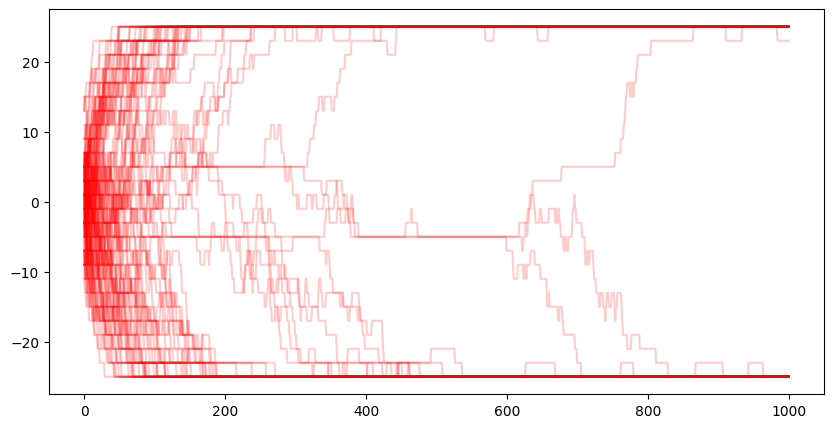

In [41]:
for mh in results:
    plt.plot(mh,'r', alpha=0.2)
plt.show()

## Exercise: generate a curve of absolute value of magnetization at step 100 for temperature for temperatures = 0.1, 0.5, 1, 2, 5, 20, 50, 100, 500

Cem simulações independentes de possíveis formas pelas quais o sistema poderia entrar em um estado magnetizado a temperatura baixa, mesmo quando cada site de lattice original foi inicializado aleatoriamente. 

In [ ]:
results = []
temps = [0.1, 0.5, 1, 2, 5, 20, 50, 100, 500]

# mcmc steps
def mcmcAdjust(state, beta):
    n = state.shape[0]
    m = state.shape[1]
    x, y = np.random.randint(0, n), np.random.randint(0, m)
    centerS = state[x, y]
    cost = costForCenterState(state, x, y, n, m)
    if cost < 0:
        centerS *= -1
    elif np.random.random() < np.exp(-cost * beta):
        centerS *= -1
    state[x, y] = centerS
    return state
    
def runState(state, beta, n_steps, snapsteps = None):
    if snapsteps is None:
        snapsteps = np.linspace(0, n_steps, num = round(n_steps / (M * N * 100)), dtype = np.int32)
    saved_states = []
    sp = 0
    magnet_hist = []
    for i in range(n_steps):
        state = mcmcAdjust(state, beta)
        magnet_hist.append(magnetizationForState(state))
        if sp < len(snapsteps) and i == snapsteps[sp]:
            saved_states.append(np.copy(state))
            sp += 1
    return state, saved_states, magnet_hist


res = []
for temp in temps:
    temp_res = []
    for _ in range(20):
        init_state = initRandState(N, M)
        final_state, states, magnet_hist = runState(init_state, 1/temp, 100)
        temp_res.append(abs(magnet_hist[-1]))
    res.append(np.mean(temp_res))

In [ ]:
temps

In [ ]:
plt.plot(temps, res)

## Exercise: what might an agent-based model look like when applied to this problem?